# PROJECT-EVALUATION-PHASE--1

# NAME:  GLOBAL POWER PLANT PROJECT

# PROBLEM STATEMENT: We can handle this dataset in two methods. First, is considering capacity_mw as target, which is a float value(continuous) and another target as Primary Fuel which is categorical datatype. We can try to predict capacity_mw by using regression  methods and Primary fuel can be predicted by using classifiers.

I am going to consider Capacity_mw as my target in the first part of the execution.

# Importing necessary libraries¶

In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Downloading the csv file from Github to PC and then uploading it into Jupyternotebook. Further importing the file here using p.read_csv.

In [244]:
df=pd.read_csv("database_IND (1).csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [294]:
df.shape

(907, 27)

The dataset contains 907 rows and 27 columns.

In [295]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [296]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Columns or attributes

In [297]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [149]:
df.columns.to_list()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

There are 27 columns altogether, out of which 26 or 25 columns are features or independent variables and 
our target or label is capacity_mw and even we can consider primary fual also as our target. We can both cases as target and 
evaluate. 
We have Country from which plant belongs to, country_long, name of the power plant. There is longitude
latitude, other fuels 1, 2, 3. Owner of the power plant, url information, geolocation_source, wepp id, year_of_capacity_data,  and generation_data_source, commissioning_data and generation growth from years 2013 to 2019 and final variable is estimated generation growth.   

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

The dataset contains two datatypes, object for categorical data coloumns and float for numeric data.
Range of data is 0 to 906. Total of 27 columns. Memory usage is 191.4+ KB.  

In [299]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")
 

IND    907
Name: country, dtype: int64


India    907
Name: country_long, dtype: int64


ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64


WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64


5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     

There are no wide spaces. But there are NaN values present as the lenght of few columns is not equal to 907 rows.

In [3]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [302]:
df.isnull().sum().sum()

10445

There are a total of 10445 missing values.

<AxesSubplot:>

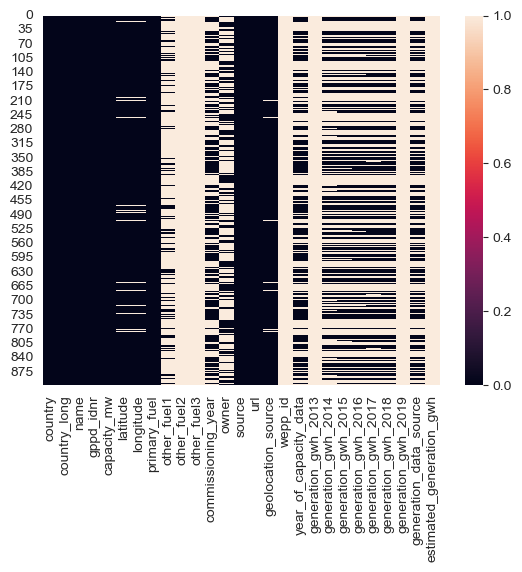

In [303]:
sns.heatmap(df.isnull())

In [ ]:
AS the data and map suggest, there are a number of Missing values noted. 
Other Fuel3, generation_gwh_2013,  generation_gwh_2019, and estimated_generation_gwh have almost all the rows as null.
Other fuel2 has 906 missing values. 

country, country_long, name, gppd_idnr, capacity_mw, source and url do not have missing values. 
The rest of the columns in the dataset have missing values in various proportions, which can be replaced by different methods.

In [150]:
df.nunique().to_frame("Unique Values of Powerplant")


,Unique Values of Powerplant
country,1
country_long,1
name,907
gppd_idnr,907
capacity_mw,361
latitude,836
longitude,827
primary_fuel,8
other_fuel1,3
other_fuel2,1


In [ ]:
Country, country_long, feul2, generation_data_source, year_of_capacity_data	have just 1 unique value. 
Other_feul3, wepp_id, generation_gwh_2019, generation_gwh_2019, estimated_generation_gwh have 0  unique values (All have NaN values)
Name, gppd_idnr have 907 total unique values. The rest of columns have their respective unique values as shown in list.

# Considering capacity_mw as our target/label, we can proceed with LinearRegression 

In [3]:
df['capacity_mw'].nunique()

361

# There are 361 unique values and 907 total rows. The values are float or continuous values. Therefore, we can consider this as a Regression based problem. We can predict the values using LinearRegression and other regression algorithms to predict these values.

Dropping the columns which have total 907 NaN values.

In [245]:
df.drop(['other_fuel2','other_fuel3', 'wepp_id','generation_gwh_2019' ,'estimated_generation_gwh' ], axis=1, inplace=True)

# Dropping the columns which do not yeild to the dataset prediction and also having unique values of 1.

In [246]:
df.drop(['country', 'gppd_idnr', 'other_fuel1','country_long', 'year_of_capacity_data', 'name', 'owner', 'generation_data_source'], axis=1, inplace=True)

# Filling all the numerical columns with mean or median of their respective columns

In [247]:
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].mean())
df['latitude']=df['latitude'].fillna(df['latitude'].median())
df['longitude']=df['longitude'].fillna(df['longitude'].median())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean())

# Filling the categorical columns with mode

In [248]:
df['primary_fuel']=df['primary_fuel'].fillna(df['primary_fuel'].mode()[0])


In [249]:
df['source']=df['source'].fillna(df['source'].mode()[0])
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [250]:
df.drop(['generation_gwh_2013'], axis=1, inplace=True)

In [60]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
url                    0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

Now the dataset has no missing values.

# STATISTICAL DATA SUMMARY

In [11]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.227439,77.427103,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.080491,4.815073,13.016360,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.091082,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.780000,76.719500,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2003.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


OBSERVATIONS:
1. All the row counts are equal indicating that there are no null values present inside the dataset.
2. There are no negative values present, so the data summary is perfect.
3. Skewness: The target has mean greater than median, which we will not remove the skewness from label. For the latitude,
    we can note that the median is slightly greater than mean and for longitude, mean is greater than median. 
    The rest of the columns, both mean and median are equal as we have filled the NaN values withe mean or mode.
4. Standard deviation: All the columns have standard deviatin >1. Most of them have high values, which means data is widely spread.
5. Outliers: Outliers are present in all columns since there is a large difference
    between the max and 75% values.
    

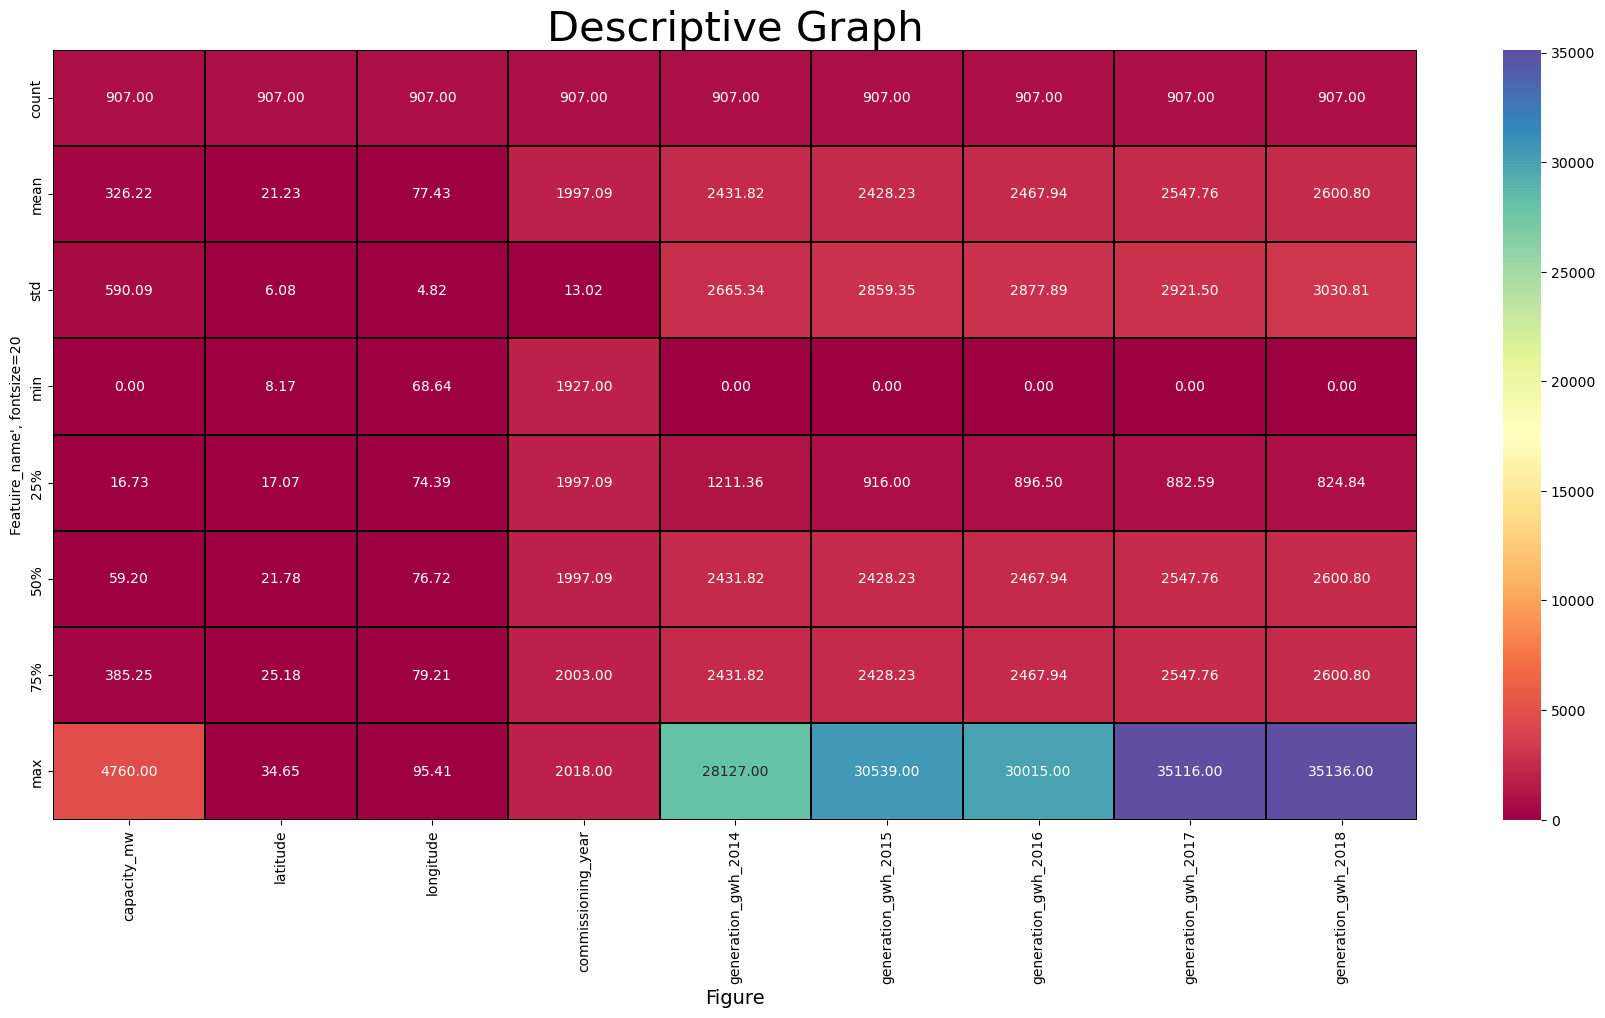

In [12]:
plt.figure(figsize=(22, 10))
sns.heatmap(df.describe(), annot=True, fmt='0.2f', linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel('Figure', fontsize=14)
plt.ylabel("Featuire_name', fontsize=20")
plt.title("Descriptive Graph", fontsize=30)
plt.show()


The heatmap shows the same descriptive satistics as the describe() method. The generation growth from 2014 to 2018 shows max
values as colored in blue.

# Graphical Explanatory Data Analysis

# Univariate Analysis using Countplots

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

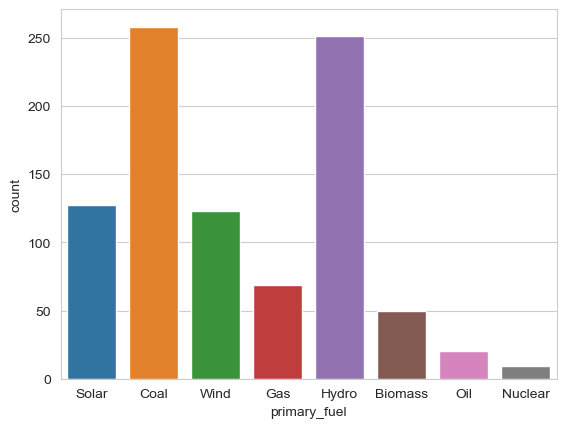

In [230]:
sns.countplot(x="primary_fuel", data=df)
df["primary_fuel"].value_counts()

In [ ]:
The different types of primary fuels are coal, which is the maximum,followed by Hydro and the least is nuclear and oil.
The other types include wind, solar, gas, biomass.

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

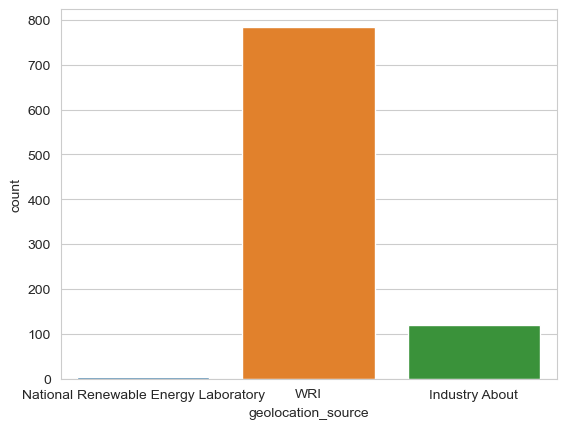

In [231]:
sns.countplot(x="geolocation_source", data=df)
df['geolocation_source'].value_counts()

In [ ]:
There are 3 geolocation sources with the respective value counts and WRI is the highest geolocation source and min is national 
renewable energy lab.

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

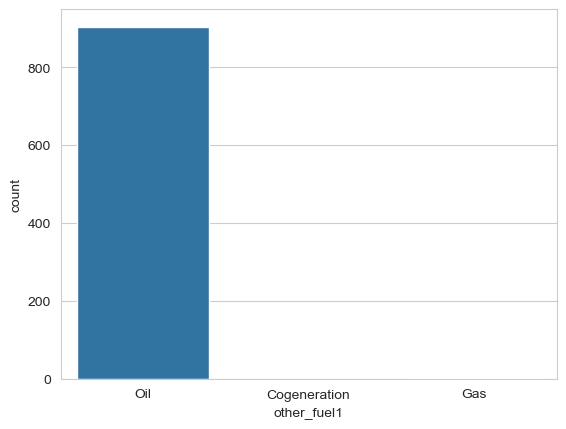

In [233]:
sns.countplot(x="other_fuel1", data=df)
df['other_fuel1'].value_counts()

Other fuels are oil which has max values, gas and Cogeneration has just 1 value.

# Histograms

<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

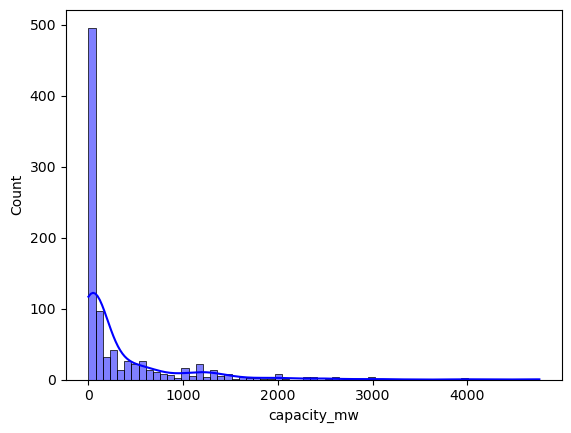

In [64]:
sns.histplot(df['capacity_mw'],kde=True,color='b')

The target lable is right skewed.

<AxesSubplot:xlabel='other_fuel1', ylabel='Count'>

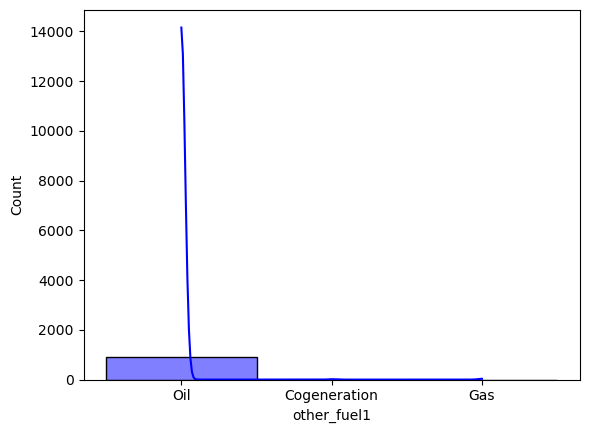

In [65]:
sns.histplot(df['other_fuel1'],kde=True,color='b')

In [ ]:
Other fuel is also right skewed

<AxesSubplot:xlabel='longitude', ylabel='Count'>

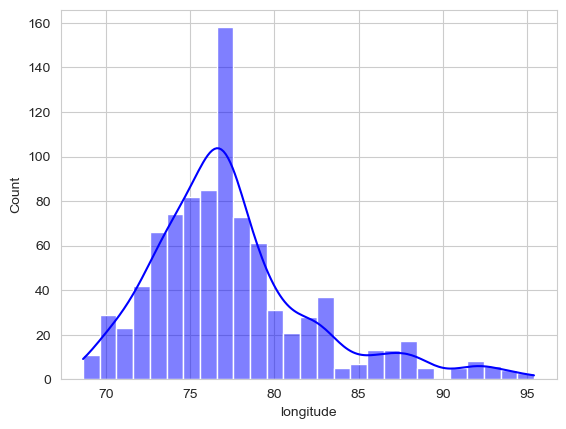

In [234]:
sns.histplot(df['longitude'],kde=True,color='b')

In [ ]:
Longitude also has a near normal curve

<AxesSubplot:xlabel='latitude', ylabel='Count'>

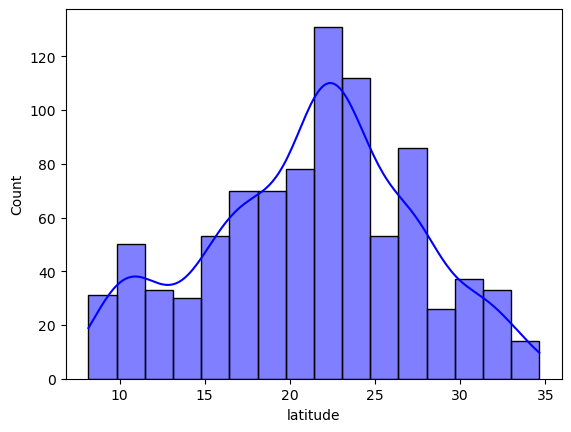

In [69]:
sns.histplot(df['latitude'],kde=True,color='b')


In [ ]:
Latitdue has a normal curve and normal distribution of data

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>,
        <AxesSubplot:title={'center':'generation_gwh_2018'}>]],
      dtype=object)

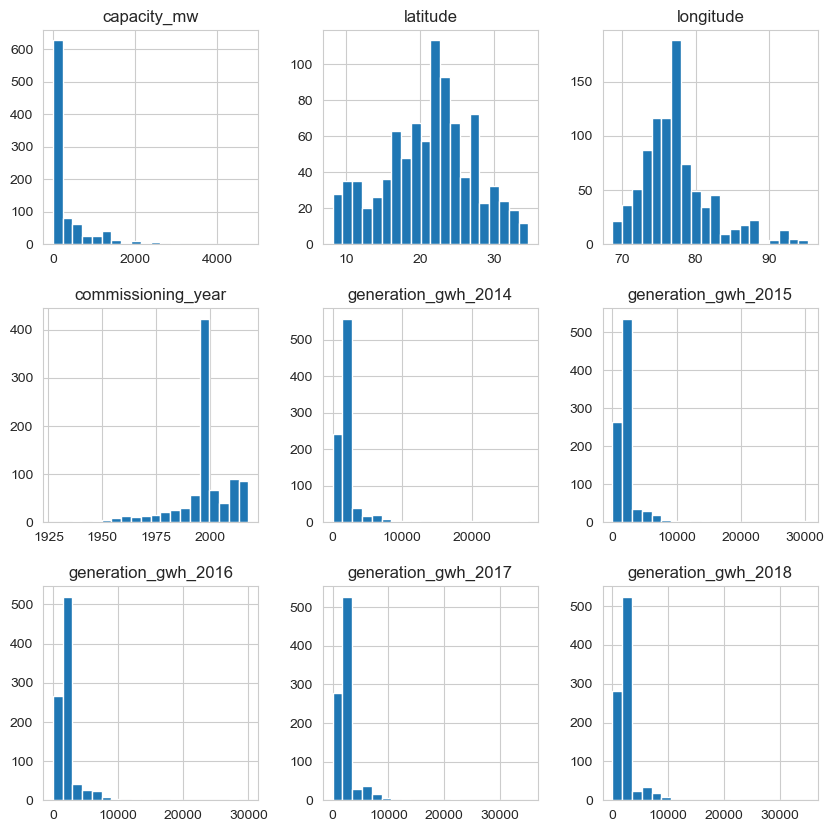

In [369]:
df.hist(bins=20, figsize=(10, 10))

The distribution shows a near normal curve for longitude and normal for latitude. commissinoing year gives a left skewed curve
All the generation growth  years have a right skewed curve.

# collecting the numerical and categorical data separately

In [251]:
numerical_col=[]    
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:", numerical_col)    

Numerical columns: ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


In [252]:
categorical_col=[]    
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:", categorical_col)    

Categorical columns: ['primary_fuel', 'source', 'url', 'geolocation_source']


# Detecting outliers using boxplot method

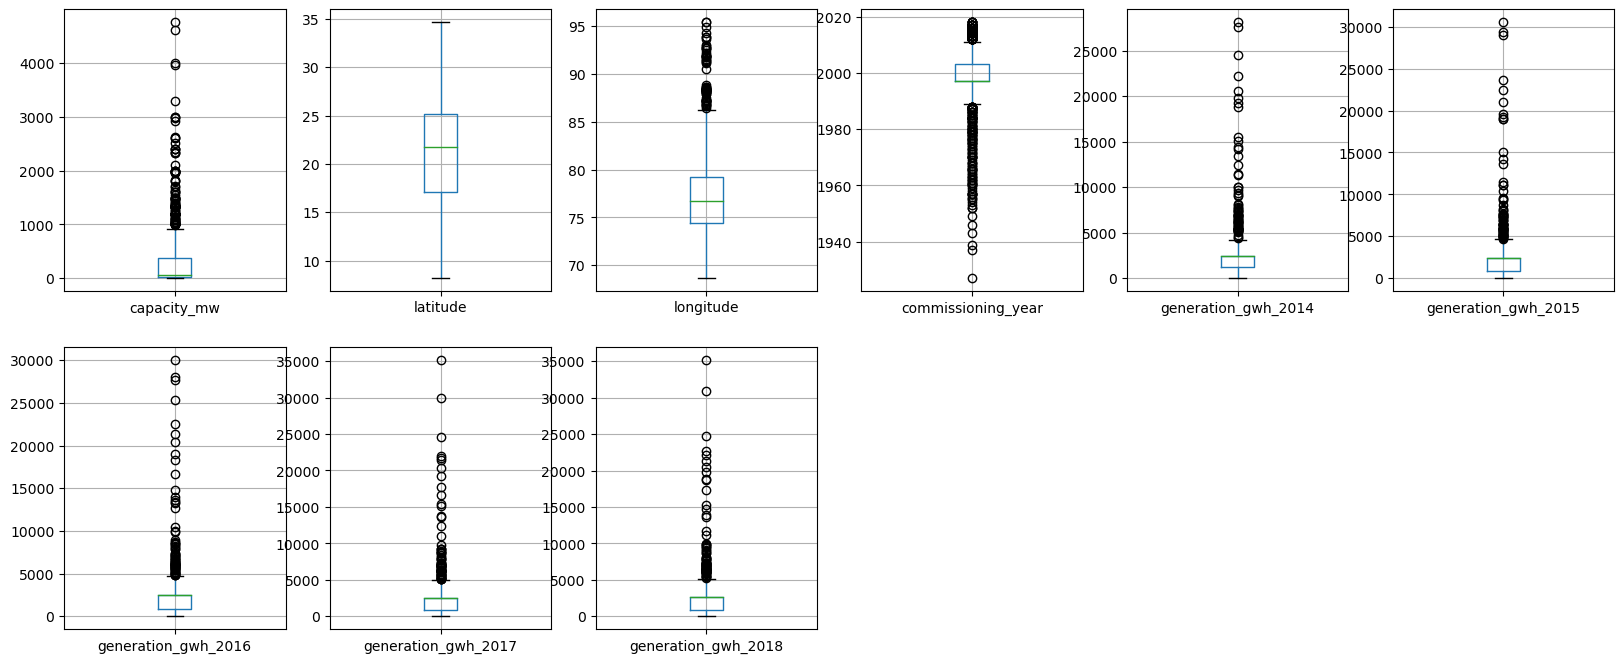

In [15]:
plt.figure(figsize=(20, 30))
plotnumber=1
for i in numerical_col:
    if plotnumber<=27:
        plt.subplot(7, 6, plotnumber)
        df.boxplot([i])
    plotnumber+=1
plt.show()

We can clearly see that capacity_mw has lot of outliers, which we will not detect as it is the Label target.
Latitude and year_of_capacity_data do not have any outliers.
Rest of the columns including longitude, commissioning_year and generation_gwth_2014 to 2018 have many outliers.


In [145]:
features=df[['longitude', 'commissioning_year','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
             'generation_gwh_2017', 'generation_gwh_2018']]

In [146]:
from scipy.stats import zscore
z=np.abs(zscore(features))
z

,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.869917,1.069162e+00,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
1,0.585590,1.747794e-14,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
2,1.673567,1.747794e-14,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
3,2.895239,5.310801e-01,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01
4,1.035238,1.376637e+00,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00
...,...,...,...,...,...,...,...
902,0.014609,1.453505e+00,1.707094e-16,0.849344,0.776810,5.761719e-01,6.319636e-01
903,0.153415,1.747794e-14,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
904,0.383592,1.747794e-14,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
905,0.764564,1.747794e-14,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16


In [18]:
np.where(z>3)

(array([ 15,  15,  15,  15, 143, 143, 143, 143, 143, 158, 179, 183, 209,
        209, 209, 209, 209, 222, 244, 308, 308, 308, 308, 308, 323, 333,
        340, 342, 360, 364, 364, 364, 364, 364, 371, 416, 427, 444, 454,
        478, 484, 493, 493, 493, 493, 493, 494, 494, 494, 494, 494, 499,
        519, 538, 541, 546, 573, 577, 583, 592, 601, 621, 638, 648, 648,
        648, 648, 648, 657, 657, 657, 657, 657, 695, 695, 695, 695, 695,
        706, 709, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726, 726,
        726, 726, 726, 728, 786, 786, 786, 786, 786, 807, 808, 808, 808,
        808, 808, 818, 847, 848, 880, 880, 880, 880, 880], dtype=int64),
 array([3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 0, 0, 2, 3, 4, 5, 6, 1, 0, 2, 3, 4,
        5, 6, 0, 0, 0, 1, 0, 2, 3, 4, 5, 6, 1, 0, 0, 1, 1, 1, 1, 2, 3, 4,
        5, 6, 2, 3, 4, 5, 6, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 3, 4,
        5, 6, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 1, 1, 2, 3, 4, 6, 2, 3, 4, 5,
        6, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 

In [93]:
z.iloc[880, 6] #zscore>3

10.740748313066986

In [92]:
z.iloc[15, 3]

3.0523223040496053

In [147]:
df1=df[(z<3).all(axis=1)]

In [320]:
df1.shape

(855, 15)

In [321]:
df.shape

(907, 15)

In [20]:
print("Old Dataframe", df.shape[0])
print("New Dataframe", df1.shape[0])
print("DataLoss percentage:", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Old Dataframe 907
New Dataframe 855
DataLoss percentage: 5.733186328555679


There is 5.7% dataloss, which we can afford and with which we can go ahead. 

In [99]:
#IQR method
q1=features.quantile(0.25)
q3=features.quantile(0.75)
IQR=q3-q1

In [100]:
df2=df[-((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR))).any(axis=1)]

In [101]:
print("Old Dataframe", df.shape[0])
print("New Dataframe", df2.shape[0])
print("DataLoss percentage:", ((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Old Dataframe 907
New Dataframe 563
DataLoss percentage: 37.92723263506063


# We can go ahead with zscore method only

In [149]:
df=df1

# BIVARIATE ANALYSIS

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

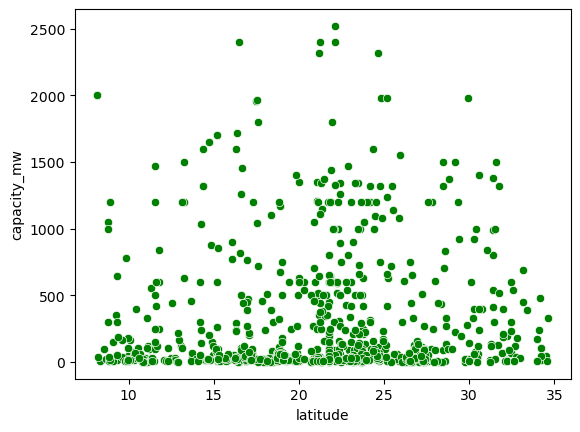

In [104]:
sns.scatterplot(x='latitude',y='capacity_mw',data=df,color="g")

The latitude and capacity_mw are positively related here. These have a strong correlation.

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

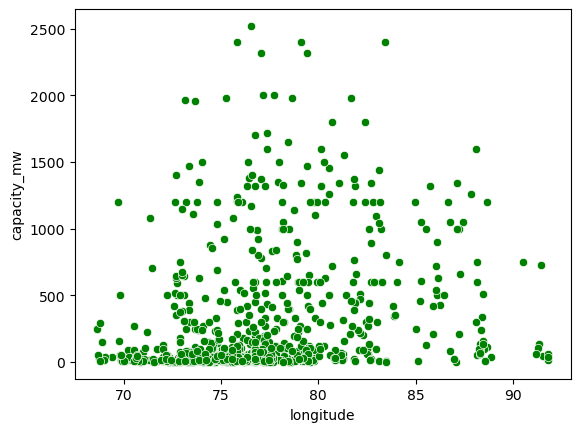

In [105]:
sns.scatterplot(x='longitude',y='capacity_mw',data=df,color="g")

The longitude and capacity also are positively related.

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

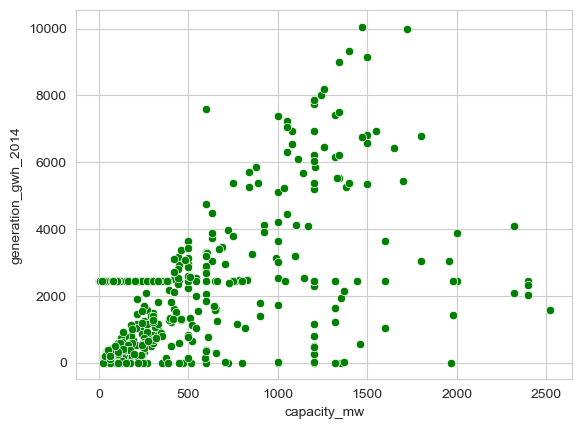

In [245]:
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df,color="g")

As the capacity increases, generation_gwh_2014 also increases, so there is a positive correlation.

<AxesSubplot:xlabel='source', ylabel='primary_fuel'>

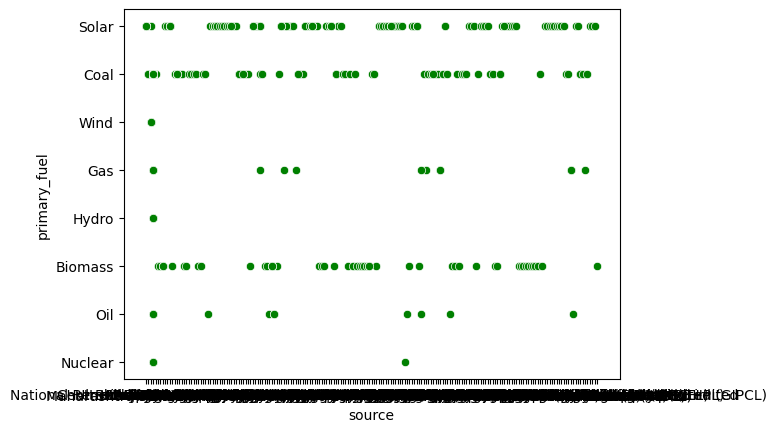

In [112]:
sns.scatterplot(x='source',y='primary_fuel',data=df,color="g")

The nuclear fuel is less compared to solar and coal and biomass. Wind has less data points. solar, coal, biomass are 
the major primary fuels.

# LINEAR MODEL PLOTS FOR THE REGRESION PROBLEM

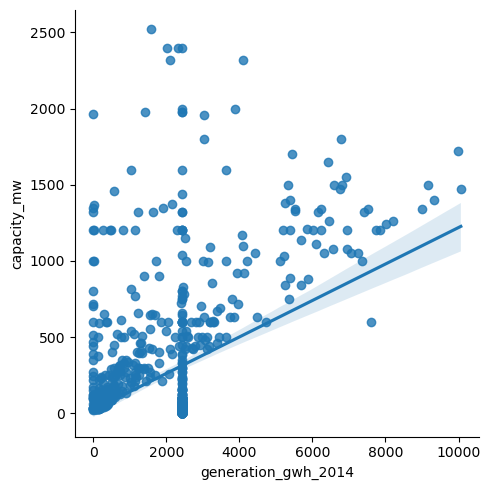

In [107]:
sns.lmplot(x='generation_gwh_2014',y='capacity_mw', data=df, palette='colorblind')

Some of the data points pass through the line of best fit. So there is a positive correlation but not as strong.

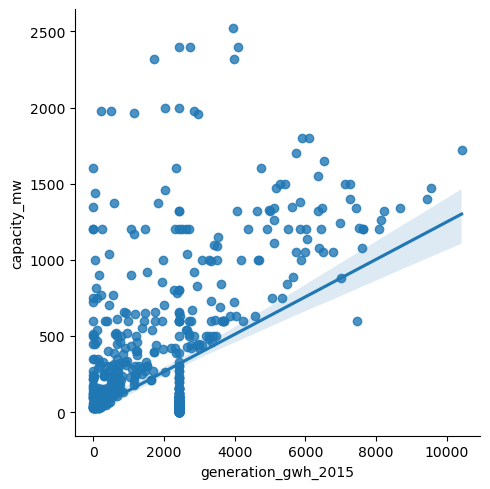

In [108]:
sns.lmplot(x='generation_gwh_2015',y='capacity_mw', data=df, palette='colorblind')

Same as above, some of the data points pass through the line of best fit. So there is a positive correlation but not as strong.

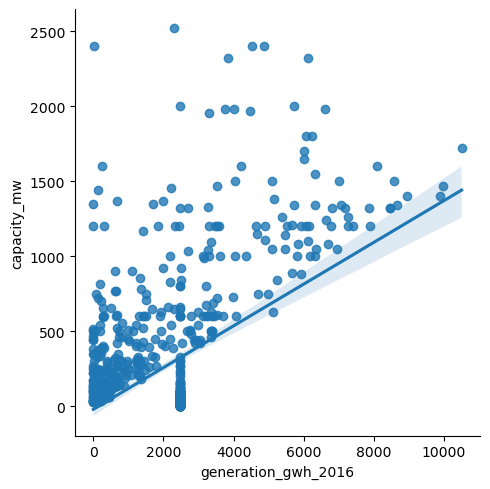

In [109]:
sns.lmplot(x='generation_gwh_2016',y='capacity_mw', data=df, palette='colorblind')

Here also, we have same conclusion as the above two LM plots. +ve but not so strong correlation.

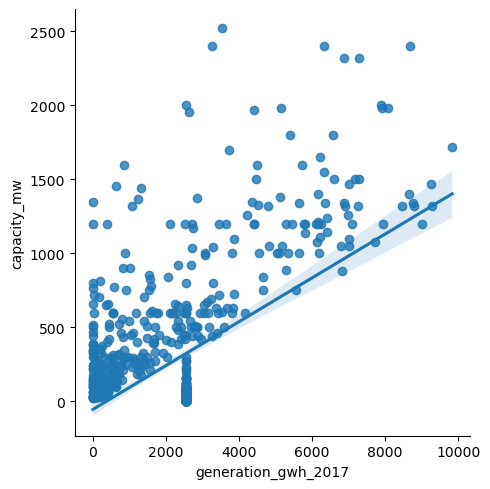

In [110]:
sns.lmplot(x='generation_gwh_2017',y='capacity_mw', data=df, palette='colorblind')

Here we can see most of the points intersect the regression line. So there is a strong and a positive correlation with year 2017. 

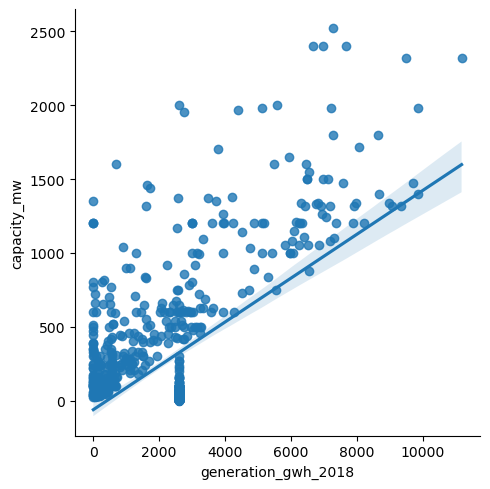

In [111]:
sns.lmplot(x='generation_gwh_2018',y='capacity_mw', data=df, palette='colorblind')

2018 generation growth and capacity are strongly and positively related. 

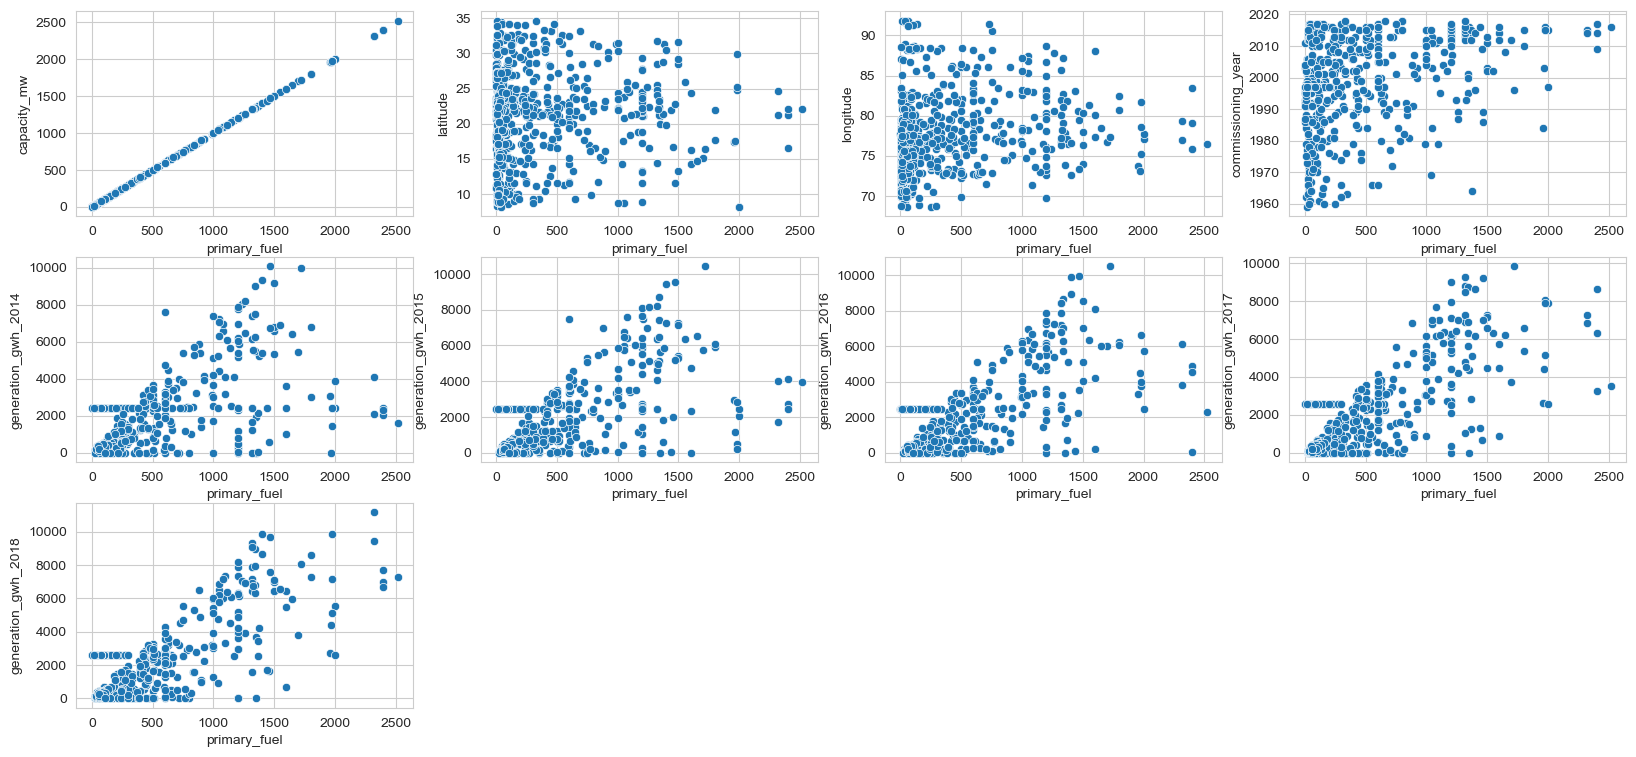

In [181]:
plt.figure(figsize=(20, 25))
p=1
for i in numerical_col:
    if p<=23:
        plt.subplot(8, 4 , p)
        sns.scatterplot(x='capacity_mw', y=i, data=df, palette ='bright')
        plt.xlabel('primary_fuel')
        plt.ylabel(i)
    p+=1
plt.show()


The primary fuel has as positive correlation with almost all variables. This is a strong contributing factor.

# Distribution plots for checking skewness of the dataset # though dist plot is being depricated

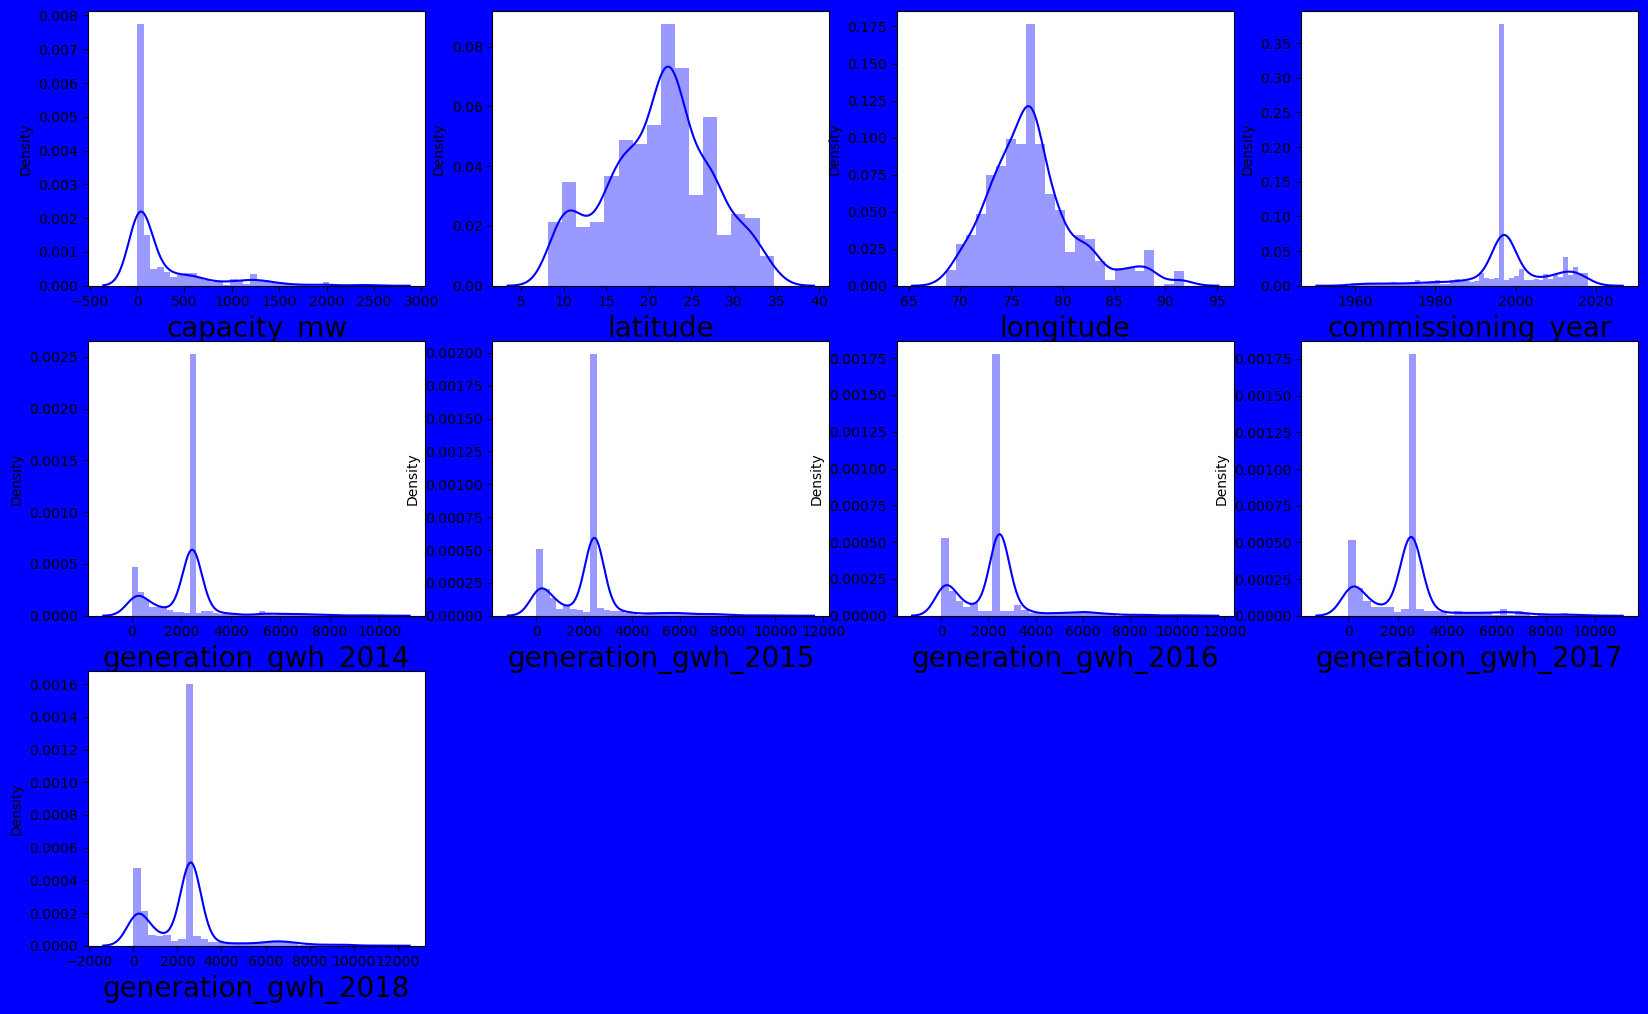

In [22]:
plt.figure (figsize=(20, 25), facecolor='blue') #despite the fact that distplot will be depricated, am trying out this. 
plotnumber=1
for column in numerical_col:
    if plotnumber<=18:
        ax=plt.subplot(6,4, plotnumber)
        sns.distplot(df[column], color='b')
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

Capacity_mw is  right-skewed. Lattitude has  a normal distribution. Commissioning year has left-ward skewness.
Longitude has slight right skewness and generation_gwth from 2014 to 2018 have right skewness. 

In [150]:
df.skew()

capacity_mw            2.163488
latitude              -0.125547
longitude              0.944467
commissioning_year    -0.836962
generation_gwh_2014    1.525975
generation_gwh_2015    1.375828
generation_gwh_2016    1.389992
generation_gwh_2017    1.293269
generation_gwh_2018    1.421012
dtype: float64

In [ ]:
Reducing skewness by powertransformer method

In [151]:
#instead of trying individually, tried grouping all variables and applying skewness reducing methods
skew=["longitude","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017", 
    "generation_gwh_2018", "commissioning_year"]

In [152]:
#tried cuberoots and square roots, which do not reduce the skeness completely, so tried this method which worked
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[skew] = scaler.fit_transform(df[skew].values)

In [153]:
df.skew()

capacity_mw            2.163488
latitude              -0.125547
longitude             -0.000738
commissioning_year     0.028796
generation_gwh_2014   -0.241358
generation_gwh_2015   -0.309409
generation_gwh_2016   -0.311647
generation_gwh_2017   -0.330764
generation_gwh_2018   -0.328334
dtype: float64

Skewness has been successfully reduced in all columns except label.

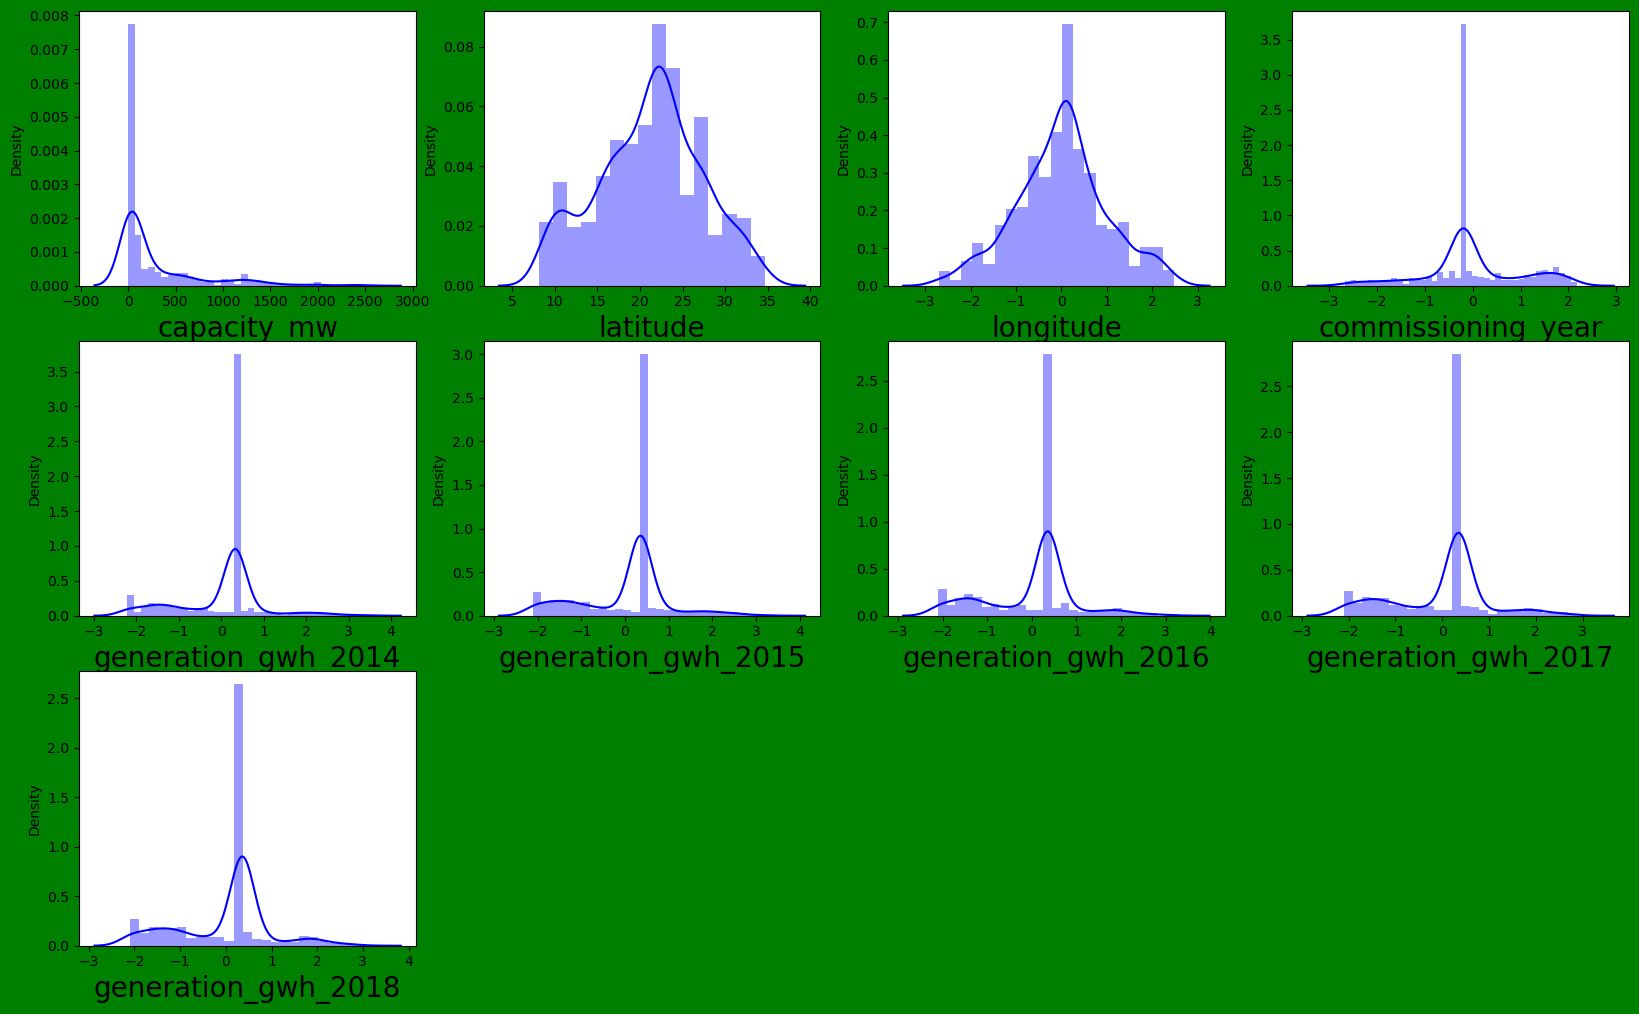

In [27]:
plt.figure (figsize=(20, 25), facecolor='green')
plotnumber=1
for column in numerical_col:
    if plotnumber<=18:
        ax=plt.subplot(6,4, plotnumber)
        sns.distplot(df[column], color='b')
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

The distribution shows reduction of skewness to some extent and the curves have been normalized.

# MULTIVARIATE ANALYSIS

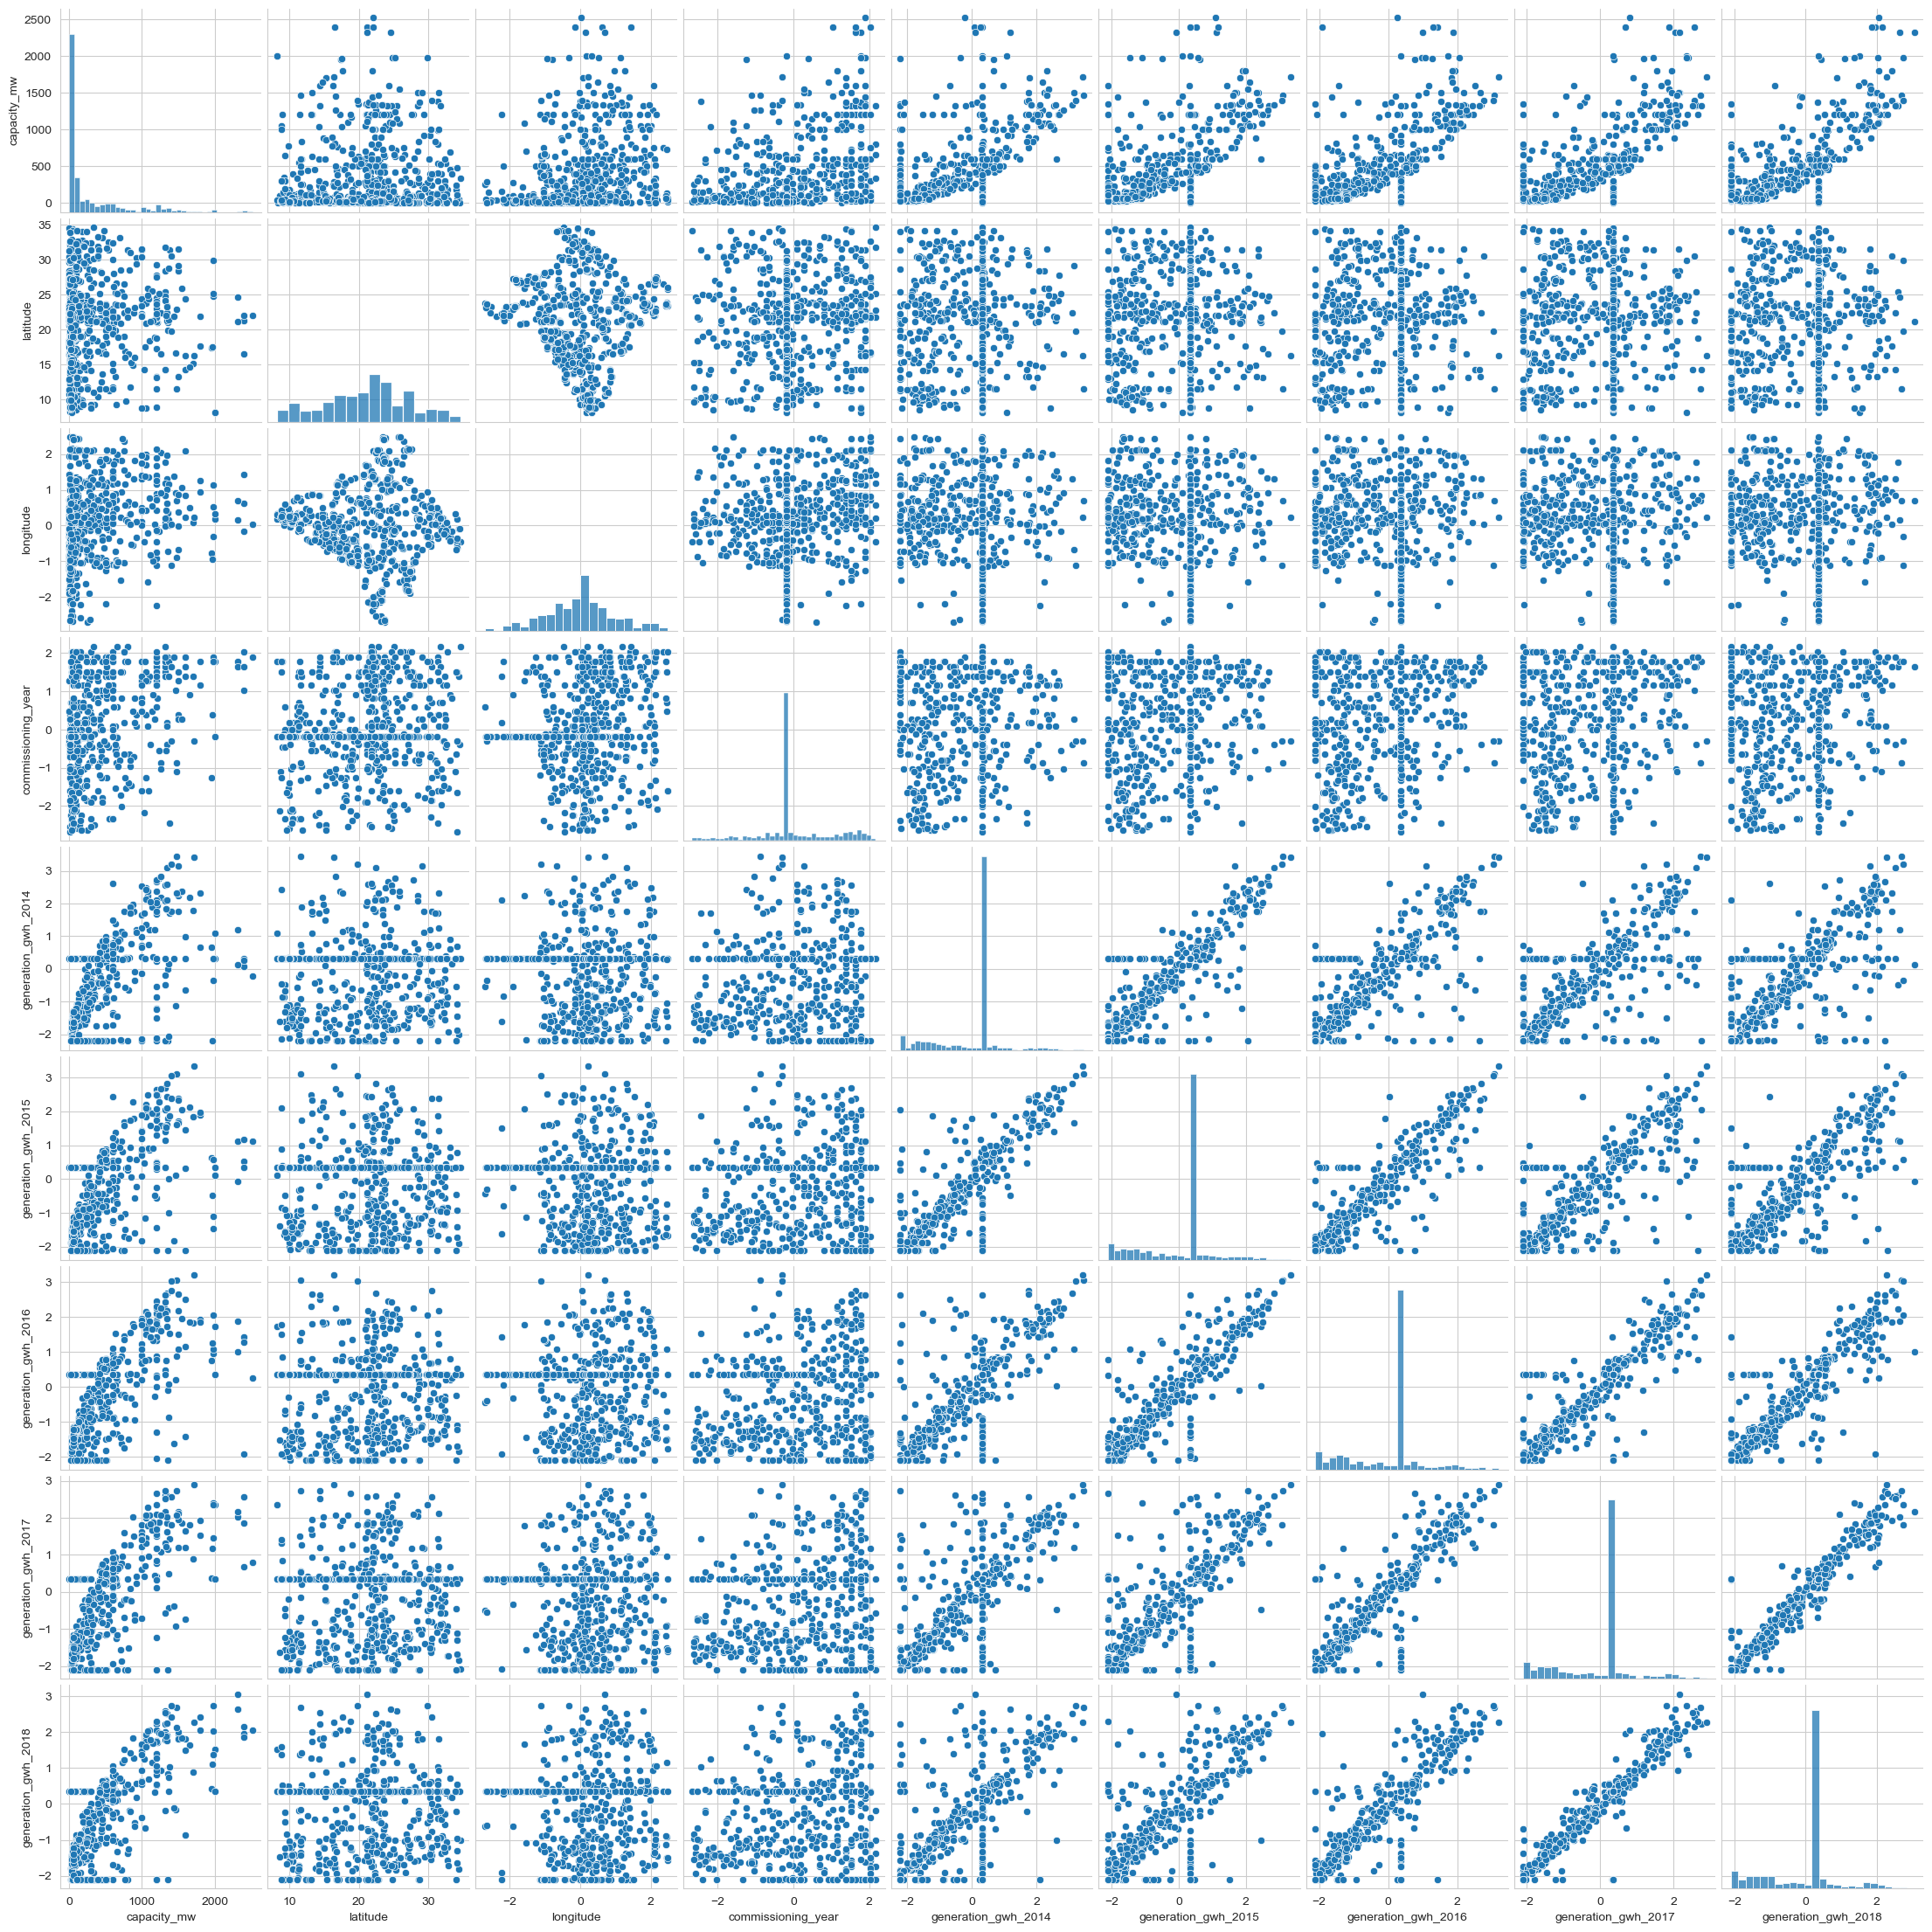

In [252]:
sns.pairplot(data=df)

In [ ]:
The pairplot shows distribution data in the diagonals. The target variable has same pattern with all the generation growth years.


# Compiling the correlation of target with other variables and each variable with other variables.

In [28]:
df.corr()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.037852,0.262597,0.379666,0.271289,0.281333,0.342914,0.380806,0.388983
latitude,0.037852,1.000000,-0.072229,0.109521,0.053204,0.040365,0.046901,0.024404,0.031158
longitude,0.262597,-0.072229,1.000000,0.188418,-0.116254,-0.133128,-0.090670,-0.098998,-0.093499
commissioning_year,0.379666,0.109521,0.188418,1.000000,0.075587,0.090154,0.134830,0.112233,0.115688
generation_gwh_2014,0.271289,0.053204,-0.116254,0.075587,1.000000,0.865586,0.808063,0.743576,0.752232
generation_gwh_2015,0.281333,0.040365,-0.133128,0.090154,0.865586,1.000000,0.902198,0.801320,0.807371
generation_gwh_2016,0.342914,0.046901,-0.090670,0.134830,0.808063,0.902198,1.000000,0.898839,0.896645
generation_gwh_2017,0.380806,0.024404,-0.098998,0.112233,0.743576,0.801320,0.898839,1.000000,0.949351
generation_gwh_2018,0.388983,0.031158,-0.093499,0.115688,0.752232,0.807371,0.896645,0.949351,1.000000


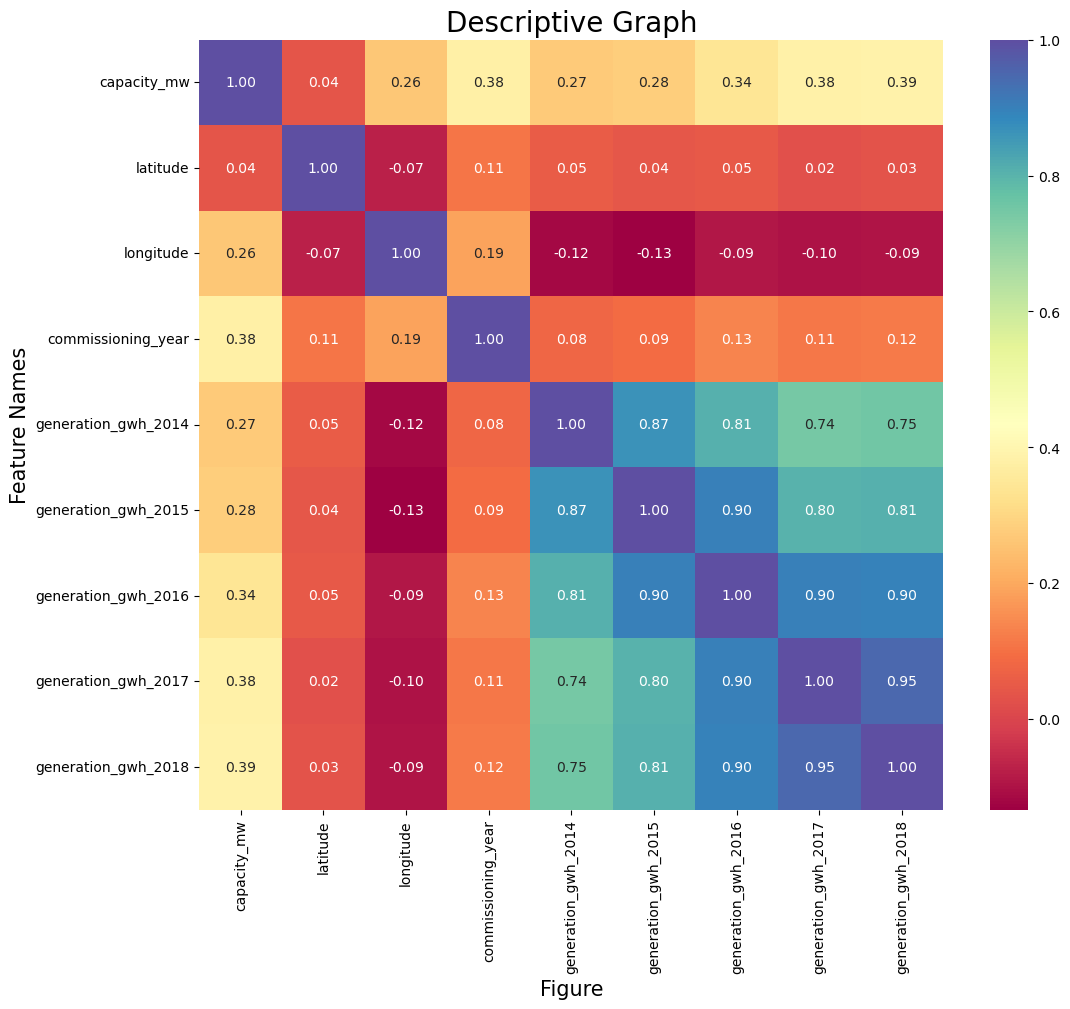

In [29]:
corr_hmap=df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_hmap, annot=True, fmt='0.2f', cmap='Spectral')
plt.xlabel("Figure", fontsize=15)
plt.ylabel("Feature Names", fontsize=15)
plt.title("Descriptive Graph", fontsize=20)
plt.show()

From the heatmap, it is evident that capacity_mw is not so strongly related with variables generation_gwh_2014, 2015, 2016,
2017, 2018 but these variables are correlated strongly with each other. We can see the different blue colors matching in the right 
bottom of the map. At the same time, longitude is very negatively related with generation growth from 2014 to 2018.


capacity has same values for commissioning year and generation growth for 2017. 
Latitude has same vaues for capacity and generation growth for 2015.
Commissioning year with lattitude and generation growth for 2015.
Generation growth for 2016 has same values wtih generation growth for 2015, 2017 and 2018.
So all these are multicollinearity issues here.

In [154]:
df.drop(['url'], axis=1, inplace=True)

# Splitting x and y for different techniques like encoding, scaling and VIF  

# Encoding the categorical data using labelencoder technique

In [155]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['primary_fuel']=le.fit_transform(df['primary_fuel'])

df['source']=le.fit_transform(df['source'])

df['geolocation_source']=le.fit_transform(df['geolocation_source'])


In [32]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,-0.924885,6,1.271916,109,1,0.325398,0.350764,0.353547,0.346830,0.356994
1,98.0,24.7663,-0.502300,1,-0.192081,174,2,0.325398,0.350764,0.353547,0.346830,0.356994
2,39.2,21.9038,-2.381088,7,-0.192081,21,2,0.325398,0.350764,0.353547,0.346830,0.356994
3,135.0,23.8712,2.435710,2,0.486435,22,2,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602
4,1800.0,21.9603,1.262854,1,1.770248,22,2,0.665459,1.898972,1.923558,1.534388,2.046635
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,0.230494,1,1.900885,22,2,0.325398,-2.098927,-1.419729,-0.723788,-0.861856
903,3.0,12.8932,0.420498,6,-0.192081,77,0,0.325398,0.350764,0.353547,0.346830,0.356994
904,25.5,15.2758,-0.226535,7,-0.192081,21,2,0.325398,0.350764,0.353547,0.346830,0.356994
905,80.0,24.3500,-0.763359,1,-0.192081,59,2,0.325398,0.350764,0.353547,0.346830,0.356994


In [156]:
x=df.drop(['capacity_mw'], axis=1)
x


,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,28.1839,-0.924885,6,1.271916,109,1,0.325398,0.350764,0.353547,0.346830,0.356994
1,24.7663,-0.502300,1,-0.192081,174,2,0.325398,0.350764,0.353547,0.346830,0.356994
2,21.9038,-2.381088,7,-0.192081,21,2,0.325398,0.350764,0.353547,0.346830,0.356994
3,23.8712,2.435710,2,0.486435,22,2,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602
4,21.9603,1.262854,1,1.770248,22,2,0.665459,1.898972,1.923558,1.534388,2.046635
...,...,...,...,...,...,...,...,...,...,...,...
902,16.2949,0.230494,1,1.900885,22,2,0.325398,-2.098927,-1.419729,-0.723788,-0.861856
903,12.8932,0.420498,6,-0.192081,77,0,0.325398,0.350764,0.353547,0.346830,0.356994
904,15.2758,-0.226535,7,-0.192081,21,2,0.325398,0.350764,0.353547,0.346830,0.356994
905,24.3500,-0.763359,1,-0.192081,59,2,0.325398,0.350764,0.353547,0.346830,0.356994


In [157]:
y=df.iloc[:, 1]

In [35]:
y

0      28.1839
1      24.7663
2      21.9038
3      23.8712
4      21.9603
        ...   
902    16.2949
903    12.8932
904    15.2758
905    24.3500
906     9.9344
Name: latitude, Length: 855, dtype: float64

# Scaling the data for normalization purposes using StandardScaler

In [158]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x=pd.DataFrame(st.fit_transform(x))
x

,0,1,2,3,4,5,6,7,8,9,10
0,1.157192,-0.924884,1.179853,1.271916,1.402768,-1.040462,0.325398,0.350764,0.353547,0.346830,0.356994
1,0.596084,-0.502300,-0.972887,-0.192081,2.829096,0.406034,0.325398,0.350764,0.353547,0.346830,0.356994
2,0.126112,-2.381087,1.610401,-0.192081,-0.528261,0.406034,0.325398,0.350764,0.353547,0.346830,0.356994
3,0.449124,2.435710,-0.542339,0.486435,-0.506318,0.406034,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602
4,0.135389,1.262854,-0.972887,1.770248,-0.506318,0.406034,0.665459,1.898972,1.923558,1.534388,2.046635
...,...,...,...,...,...,...,...,...,...,...,...
850,-0.794768,0.230494,-0.972887,1.900885,-0.506318,0.406034,0.325398,-2.098927,-1.419729,-0.723788,-0.861856
851,-1.353266,0.420498,1.179853,-0.192081,0.700575,-2.486957,0.325398,0.350764,0.353547,0.346830,0.356994
852,-0.962086,-0.226535,1.610401,-0.192081,-0.528261,0.406034,0.325398,0.350764,0.353547,0.346830,0.356994
853,0.527735,-0.763358,-0.972887,-0.192081,0.305592,0.406034,0.325398,0.350764,0.353547,0.346830,0.356994


# Variation_Inflation_Factor to reduce multicollinearity issues

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF=pd.DataFrame()
VIF["VIF values"]=[variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
VIF["features"]=x.columns
VIF

,VIF values,features
0,1.081120,0
1,1.327523,1
2,1.678944,2
3,1.111050,3
4,1.534046,4
5,1.962432,5
6,4.133315,6
7,7.734835,7
8,10.658524,8
9,11.562443,9


Generation growth for 2017 has the highest variance inflatin value. So wil drop the column.

In [160]:
df.drop(['generation_gwh_2017'], axis=1, inplace=True)

In [161]:
x=df.drop(['capacity_mw'], axis=1)
x


,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2018
0,28.1839,-0.924885,6,1.271916,109,1,0.325398,0.350764,0.353547,0.356994
1,24.7663,-0.502300,1,-0.192081,174,2,0.325398,0.350764,0.353547,0.356994
2,21.9038,-2.381088,7,-0.192081,21,2,0.325398,0.350764,0.353547,0.356994
3,23.8712,2.435710,2,0.486435,22,2,-1.051490,-0.738620,-0.686010,-0.919602
4,21.9603,1.262854,1,1.770248,22,2,0.665459,1.898972,1.923558,2.046635
...,...,...,...,...,...,...,...,...,...,...
902,16.2949,0.230494,1,1.900885,22,2,0.325398,-2.098927,-1.419729,-0.861856
903,12.8932,0.420498,6,-0.192081,77,0,0.325398,0.350764,0.353547,0.356994
904,15.2758,-0.226535,7,-0.192081,21,2,0.325398,0.350764,0.353547,0.356994
905,24.3500,-0.763359,1,-0.192081,59,2,0.325398,0.350764,0.353547,0.356994


In [162]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x=pd.DataFrame(st.fit_transform(x))
x

,0,1,2,3,4,5,6,7,8,9
0,1.157192,-0.924884,1.179853,1.271916,1.402768,-1.040462,0.325398,0.350764,0.353547,0.356994
1,0.596084,-0.502300,-0.972887,-0.192081,2.829096,0.406034,0.325398,0.350764,0.353547,0.356994
2,0.126112,-2.381087,1.610401,-0.192081,-0.528261,0.406034,0.325398,0.350764,0.353547,0.356994
3,0.449124,2.435710,-0.542339,0.486435,-0.506318,0.406034,-1.051490,-0.738620,-0.686010,-0.919602
4,0.135389,1.262854,-0.972887,1.770248,-0.506318,0.406034,0.665459,1.898972,1.923558,2.046635
...,...,...,...,...,...,...,...,...,...,...
850,-0.794768,0.230494,-0.972887,1.900885,-0.506318,0.406034,0.325398,-2.098927,-1.419729,-0.861856
851,-1.353266,0.420498,1.179853,-0.192081,0.700575,-2.486957,0.325398,0.350764,0.353547,0.356994
852,-0.962086,-0.226535,1.610401,-0.192081,-0.528261,0.406034,0.325398,0.350764,0.353547,0.356994
853,0.527735,-0.763358,-0.972887,-0.192081,0.305592,0.406034,0.325398,0.350764,0.353547,0.356994


In [163]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF=pd.DataFrame()
VIF["VIF values"]=[variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
VIF["features"]=x.columns
VIF

,VIF values,features
0,1.079807,0
1,1.325774,1
2,1.678892,2
3,1.110896,3
4,1.533991,4
5,1.962424,5
6,4.131119,6
7,7.693997,7
8,9.693783,8
9,5.211138,9


We have successfully reduced the VIF factor and all the variables have acceptable range of less than 10.

# Selecting the best random score for my model and fitting and training the model on that state.

In [164]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [166]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i, test_size=.33)
    lg=LinearRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 1.0 on Random_state 1


# Best R2 score is 100% at random state of 1

# Splitting the x and y train and test on this random state

In [168]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.33, random_state=1)


In [169]:
x_train.shape

(572, 10)

In [170]:
x_test.shape

(283, 10)

In [171]:
y_train.shape

(572,)

In [172]:
y_test.shape

(283,)

In [175]:
lg=LinearRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
pred_lg=lg.predict(x_test)
print("R2_score:",r2_score(y_test, pred_lg))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Error:")
print("Mean squared error:", mean_squared_error(y_test, pred_lg))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_lg))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_lg)))
      

R2_score: 1.0
R2_score on training data 99.99879388836807
Error:
Mean squared error: 1.7070615489658928e-29
Mean_absolute_error 3.207485317786318e-15
Root_mean_Squared_error: 4.131660137240105e-15


In [174]:
rfr=RandomForestRegressor()
rfr.fit(x_train, y_train)
pred_rfr=rfr.predict(x_test) 
pred_train=rfr.predict(x_train)
print('R2_score', r2_score(y_test, pred_rfr))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_rfr))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_rfr))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_rfr)))
      

R2_score 0.9999104954398235
R2_score on training data 99.99879388836807
Mean squared error: 0.0032287248436113736
Mean_absolute_error 0.031602452296819857
Root_mean_Squared_error: 0.05682186941320545


In [176]:
knn=KNN()
knn.fit(x_train, y_train)
pred_knn=rfr.predict(x_test) 
pred_train=knn.predict(x_train)
print('R2_score', r2_score(y_test, pred_knn))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_knn))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_knn))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_knn)))
      

R2_score 0.9999104954398235
R2_score on training data 95.13793352137154
Mean squared error: 0.0032287248436113736
Mean_absolute_error 0.031602452296819857
Root_mean_Squared_error: 0.05682186941320545


In [177]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train, y_train)
pred_dtc=dtc.predict(x_test) 
pred_train=dtc.predict(x_train)
print('R2_score', r2_score(y_test, pred_dtc))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_dtc))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_dtc))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_dtc)))
      

R2_score 0.9997804360735446
R2_score on training data 100.0
Mean squared error: 0.007920395371024746
Mean_absolute_error 0.04819469964664396
Root_mean_Squared_error: 0.08899660314318039


In [178]:
svc=SVR()
svc.fit(x_train, y_train)
pred_svc=svc.predict(x_test) 
pred_train=svc.predict(x_train)
print('R2_score', r2_score(y_test, pred_svc))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_svc))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_svc))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_svc)))
      

R2_score 0.9662543810335316
R2_score on training data 96.80235165668931
Mean squared error: 1.2173158340227652
Mean_absolute_error 0.6136593231574872
Root_mean_Squared_error: 1.103320367809262


In [179]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test) 
pred_train=gbr.predict(x_train)
print('R2_score', r2_score(y_test, pred_gbr))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_gbr))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_gbr))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_gbr)))
      

R2_score 0.9999140005974335
R2_score on training data 99.99689493202976
Mean squared error: 0.0031022822418737546
Mean_absolute_error 0.04084864842644418
Root_mean_Squared_error: 0.05569813499457369


In [180]:
rd=Ridge()
rd.fit(x_train, y_train)
pred_rd=rd.predict(x_test) 
pred_train=rd.predict(x_train)
print('R2_score', r2_score(y_test, pred_rd))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_rd))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_rd))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_rd)))
      

R2_score 0.9999966806562043
R2_score on training data 99.9996788549743
Mean squared error: 0.0001197396842881183
Mean_absolute_error 0.008846037001593855
Root_mean_Squared_error: 0.010942562967062072


In [181]:
la=Lasso()
la.fit(x_train, y_train)
pred_la=la.predict(x_test) 
pred_train=la.predict(x_train)
print('R2_score', r2_score(y_test, pred_la))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_la))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_la))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_la)))
      

R2_score 0.9737657992478418
R2_score on training data 97.37659555053615
Mean squared error: 0.9463541919402021
Mean_absolute_error 0.7813773620804505
Root_mean_Squared_error: 0.9728073765860341


# CROSS_VAL_SCORE CALCULATION

In [182]:
from sklearn.model_selection import cross_val_score

In [183]:
score=cross_val_score(lg, x, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_lg)-score.mean()))

[1. 1. 1. 1. 1.]
1.0
Difference between R2 Score and cross validation score is: 0.0


In [184]:
score1=cross_val_score(rfr, x, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_rfr)-score.mean())*100)

[1. 1. 1. 1. 1.]
1.0
Difference between R2 Score and cross validation score is: -0.00895045601765343


In [185]:
score2=cross_val_score(knn, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_knn)-score.mean())*100)

[1. 1. 1. 1. 1.]
1.0
Difference between R2 Score and cross validation score is: -0.00895045601765343


In [186]:
score3=cross_val_score(rfr, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is -", (r2_score(y_test, pred_rfr)-score.mean())*100)

[1. 1. 1. 1. 1.]
1.0
Difference between R2 Score and cross validation score is - -0.00895045601765343


In [187]:
score3=cross_val_score(rfr, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is -", (r2_score(y_test, pred_rfr)-score.mean())*100)

[1. 1. 1. 1. 1.]
1.0
Difference between R2 Score and cross validation score is - -0.00895045601765343


In [188]:
score4=cross_val_score(dtc, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_dtc)-score.mean())*100)

[1. 1. 1. 1. 1.]
1.0
Difference between R2 Score and cross validation score is: -0.021956392645539058


In [189]:
score5=cross_val_score(gbr, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_gbr)-score.mean()))

[1. 1. 1. 1. 1.]
1.0
Difference between R2 Score and cross validation score is: -8.599940256648342e-05


In [190]:
score6=cross_val_score(la, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_la)-score.mean())*100)

[1. 1. 1. 1. 1.]
1.0
Difference between R2 Score and cross validation score is: -2.623420075215821


In [191]:
score7=cross_val_score(rd, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_rd)-score.mean())*100)

[1. 1. 1. 1. 1.]
1.0
Difference between R2 Score and cross validation score is: -0.00033193437957157457


In [192]:
score8=cross_val_score(svc, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_svc)-score.mean()))

[1. 1. 1. 1. 1.]
1.0
Difference between R2 Score and cross validation score is: -0.03374561896646844


# I am choosing LinearRegression as my best model, which gives 100% accuracy and 0% error. While others also yeild good results. 

# Hyperparameter Tuning for LinearRegression
#GridSearchCV

In [193]:
from sklearn.model_selection import GridSearchCV

In [194]:
parameters={'fit_intercept':[True], 'copy_X':[True], 'n_jobs':[None], 'positive':[False]}

In [195]:
GCV=GridSearchCV(LinearRegression(), parameters, cv=5)

In [196]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [None], 'positive': [False]})

In [197]:
GCV.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [198]:
GModel=LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
GModel.fit(x_train, y_train)
pred=GModel.predict(x_test)
print("R2_Score:", r2_score(y_test, pred))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean square error:", mean_squared_error(y_test, pred))
print("Mean absolute error:", mean_absolute_error(y_test, pred))
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test, pred)))

R2_Score: 1.0
R2_score on training data 97.37659555053615
Mean square error: 1.7070615489658928e-29
Mean absolute error: 3.207485317786318e-15
Root mean squared error: 4.131660137240105e-15


# My new model is giving 100% r2_score. The score on training data is 97%. Mean square error is 1.7, mean absolute error is 3.2 and root mean squared error is 4. 

# Saving my New Model

In [199]:
import joblib
filename='GPP'
joblib.dump(GModel, 'GPP.obj')

['GPP.obj']

In [200]:
import joblib
GModel=joblib.load('GPP.obj')
result=GModel.score(x_test, y_test)
print(result*100)

100.0


In [201]:
Conclusion=pd.DataFrame([GModel.predict(x_test)[:],y_test[:]], index=["predicted", "original"])
Conclusion                    

,0,1,2,3,4,5,6,7,8,9,...,273,274,275,276,277,278,279,280,281,282
predicted,31.382,21.2285,19.261,21.9114,27.818,27.7355,19.108,9.9855,23.8712,21.78,...,21.78,19.5132,16.9171,16.4994,21.184,11.5214,22.2396,32.0041,21.2083,24.3696
original,31.382,21.2285,19.261,21.9114,27.818,27.7355,19.108,9.9855,23.8712,21.78,...,21.78,19.5132,16.9171,16.4994,21.184,11.5214,22.2396,32.0041,21.2083,24.3696


In [202]:
t=np.array([1.157192,-0.924884,1.179853,1.271916,1.402768,-1.040462,0.325398,0.350764,0.353547,0.356994])
t.shape

(10,)

In [203]:
t=t.reshape(1,-1)

In [209]:
GModel.predict(t)


array([28.1838985])

# CONSIDERING PRIMARY FUEL AS TARGET, WE CAN CONSIDER HERE, THE PROBLEM STATEMENT TO IDENTIFY THE PRIMARY FUEL TYPE, (solar, coal,oil, gas, biomass, nuclear) 


In [63]:
df['primary_fuel'].nunique()

8

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

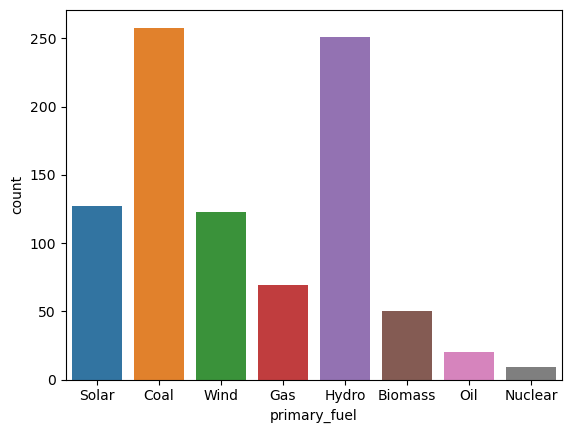

In [232]:
sns.countplot(x='primary_fuel', data=df)
df["primary_fuel"].value_counts()

In [253]:
features=df[['capacity_mw', 'longitude', 'commissioning_year','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
             'generation_gwh_2017', 'generation_gwh_2018']]

In [254]:
from scipy.stats import zscore
z=np.abs(zscore(features))
z

,capacity_mw,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.548908,0.869917,1.069162e+00,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
1,0.386977,0.585590,1.747794e-14,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
2,0.486679,1.673567,1.747794e-14,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
3,0.324240,2.895239,5.310801e-01,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01
4,2.498942,1.035238,1.376637e+00,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00
...,...,...,...,...,...,...,...,...
902,2.159821,0.014609,1.453505e+00,1.707094e-16,0.849344,0.776810,5.761719e-01,6.319636e-01
903,0.548060,0.153415,1.747794e-14,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
904,0.509909,0.383592,1.747794e-14,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
905,0.417498,0.764564,1.747794e-14,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16


In [16]:
df.shape

(907, 13)

In [255]:
df1=df[(z<3).all(axis=1)]

In [18]:
df1.shape

(849, 13)

In [256]:
print("Old Dataframe", df.shape[0])
print("New Dataframe", df1.shape[0])
print("DataLoss percentage:", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Old Dataframe 907
New Dataframe 849
DataLoss percentage: 6.39470782800441


In [ ]:
Dataloss is just 6%, so we can go ahead with this loss.

In [257]:
df=df1

In [258]:
df.skew()

capacity_mw            1.979914
latitude              -0.124495
longitude              0.949270
commissioning_year    -0.845654
generation_gwh_2014    1.526648
generation_gwh_2015    1.389889
generation_gwh_2016    1.413144
generation_gwh_2017    1.278735
generation_gwh_2018    1.315481
dtype: float64

In [259]:
skew=["capacity_mw","longitude","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017", 
    "generation_gwh_2018", "commissioning_year"]

In [260]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[skew] = scaler.fit_transform(df[skew].values)

In [261]:
df.skew()

capacity_mw            0.015527
latitude              -0.124495
longitude             -0.000228
commissioning_year     0.031733
generation_gwh_2014   -0.243975
generation_gwh_2015   -0.309166
generation_gwh_2016   -0.309194
generation_gwh_2017   -0.340677
generation_gwh_2018   -0.354764
dtype: float64

In [262]:
df.drop(['url'],inplace =True, axis=1)

In [263]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['source']=le.fit_transform(df['source'])
df['primary_fuel']=le.fit_transform(df['primary_fuel'])
df['geolocation_source']=le.fit_transform(df['geolocation_source'])


In [264]:
x=df.drop(['primary_fuel'],axis=1)
x

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.676571,28.1839,-0.919983,1.292854,109,1,0.327200,0.356092,0.359399,0.360086,0.375133
1,0.228490,24.7663,-0.497623,-0.181973,174,2,0.327200,0.356092,0.359399,0.360086,0.375133
2,-0.268904,21.9038,-2.377112,-0.181973,21,2,0.327200,0.356092,0.359399,0.360086,0.375133
3,0.400958,23.8712,2.430046,0.501339,22,2,-1.046002,-0.731478,-0.683964,-0.905238,-0.925585
4,1.752129,21.9603,1.263537,1.795252,22,2,0.665917,1.898269,1.935543,1.564919,2.122435
...,...,...,...,...,...,...,...,...,...,...,...
902,1.692530,16.2949,0.234164,1.926982,22,2,0.327200,-2.096477,-1.420156,-0.721222,-0.867297
903,-1.597223,12.8932,0.423767,-0.181973,77,0,0.327200,0.356092,0.359399,0.360086,0.375133
904,-0.502886,15.2758,-0.222141,-0.181973,21,2,0.327200,0.356092,0.359399,0.360086,0.375133
905,0.118754,24.3500,-0.758514,-0.181973,59,2,0.327200,0.356092,0.359399,0.360086,0.375133


In [265]:
y=df.iloc[:, 3:4]
y

,primary_fuel
0,6
1,1
2,7
3,2
4,1
...,...
902,1
903,6
904,7
905,1


# Converting multiclass label to binary format

In [266]:
df.loc[df.primary_fuel!=1,'primary_fuel']=0
df.loc[df.primary_fuel==1, 'primary_fuel']=1

In [267]:
y=df.iloc[:, 3:4]
y

,primary_fuel
0,0
1,1
2,0
3,0
4,1
...,...
902,1
903,0
904,0
905,1


In [268]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x=pd.DataFrame(st.fit_transform(x))
x

,0,1,2,3,4,5,6,7,8,9,10
0,-1.676571,1.153949,-0.919983,1.292854,1.395536,-1.034548,0.327200,0.356092,0.359399,0.360086,0.375133
1,0.228490,0.594499,-0.497623,-0.181973,2.818140,0.407704,0.327200,0.356092,0.359399,0.360086,0.375133
2,-0.268904,0.125918,-2.377112,-0.181973,-0.530451,0.407704,0.327200,0.356092,0.359399,0.360086,0.375133
3,0.400958,0.447975,2.430046,0.501339,-0.508564,0.407704,-1.046002,-0.731478,-0.683964,-0.905238,-0.925585
4,1.752129,0.135167,1.263537,1.795252,-0.508564,0.407704,0.665917,1.898269,1.935543,1.564919,2.122435
...,...,...,...,...,...,...,...,...,...,...,...
844,1.692530,-0.792240,0.234164,1.926982,-0.508564,0.407704,0.327200,-2.096477,-1.420156,-0.721222,-0.867297
845,-1.597223,-1.349087,0.423767,-0.181973,0.695177,-2.476800,0.327200,0.356092,0.359399,0.360086,0.375133
846,-0.502886,-0.959064,-0.222140,-0.181973,-0.530451,0.407704,0.327200,0.356092,0.359399,0.360086,0.375133
847,0.118754,0.526352,-0.758514,-0.181973,0.301225,0.407704,0.327200,0.356092,0.359399,0.360086,0.375133


In [269]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF=pd.DataFrame()
VIF["VIF values"]=[variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
VIF["features"]=x.columns
VIF

,VIF values,features
0,1.614114,0
1,1.086105,1
2,1.211235,2
3,1.172454,3
4,1.429713,4
5,1.649512,5
6,4.197135,6
7,8.039760,7
8,11.896244,8
9,11.646072,9


In [270]:
x=df.drop(['generation_gwh_2018', 'generation_gwh_2016'],axis=1)

In [271]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x=pd.DataFrame(st.fit_transform(x))
x

,0,1,2,3,4,5,6,7,8,9
0,-1.676571,1.153949,-0.919983,-0.618657,1.292854,1.395536,-1.034548,0.327200,0.356092,0.360086
1,0.228490,0.594499,-0.497623,1.616405,-0.181973,2.818140,0.407704,0.327200,0.356092,0.360086
2,-0.268904,0.125918,-2.377112,-0.618657,-0.181973,-0.530451,0.407704,0.327200,0.356092,0.360086
3,0.400958,0.447975,2.430046,-0.618657,0.501339,-0.508564,0.407704,-1.046002,-0.731478,-0.905238
4,1.752129,0.135167,1.263537,1.616405,1.795252,-0.508564,0.407704,0.665917,1.898269,1.564919
...,...,...,...,...,...,...,...,...,...,...
844,1.692530,-0.792240,0.234164,1.616405,1.926982,-0.508564,0.407704,0.327200,-2.096477,-0.721222
845,-1.597223,-1.349087,0.423767,-0.618657,-0.181973,0.695177,-2.476800,0.327200,0.356092,0.360086
846,-0.502886,-0.959064,-0.222140,-0.618657,-0.181973,-0.530451,0.407704,0.327200,0.356092,0.360086
847,0.118754,0.526352,-0.758514,1.616405,-0.181973,0.301225,0.407704,0.327200,0.356092,0.360086


In [272]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF=pd.DataFrame()
VIF["VIF values"]=[variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
VIF["features"]=x.columns
VIF

,VIF values,features
0,1.810685,0
1,1.086921,1
2,1.275917,2
3,1.637849,3
4,1.200513,4
5,1.455138,5
6,1.674552,6
7,4.181247,7
8,5.195371,8
9,3.008761,9


# import imbalanced learn for SMOTE techniques as there is bias statment in targets.

In [275]:
!pip install imbalanced-learn

In [276]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x1,y1=smt.fit_resample(x, y)

In [277]:
x1

,0,1,2,3,4,5,6,7,8,9
0,-1.676571,1.153949,-0.919983,-0.618657,1.292854,1.395536,-1.034548,0.327200,0.356092,0.360086
1,0.228490,0.594499,-0.497623,1.616405,-0.181973,2.818140,0.407704,0.327200,0.356092,0.360086
2,-0.268904,0.125918,-2.377112,-0.618657,-0.181973,-0.530451,0.407704,0.327200,0.356092,0.360086
3,0.400958,0.447975,2.430046,-0.618657,0.501339,-0.508564,0.407704,-1.046002,-0.731478,-0.905238
4,1.752129,0.135167,1.263537,1.616405,1.795252,-0.508564,0.407704,0.665917,1.898269,1.564919
...,...,...,...,...,...,...,...,...,...,...
1223,0.317333,-0.212227,0.622692,1.616405,-0.181973,0.187466,0.407704,0.327200,0.356092,0.360086
1224,-0.022213,0.582182,-0.946958,1.616405,-0.181973,0.651405,0.407704,0.327200,0.356092,0.360086
1225,1.132575,0.278705,1.816856,1.616405,1.414230,-0.508564,0.407704,0.059744,0.481033,0.415838
1226,1.162981,-0.043416,0.456226,1.616405,1.405341,-0.508564,0.407704,0.701606,0.913519,0.569982


In [278]:
y1

,primary_fuel
0,0
1,1
2,0
3,0
4,1
...,...
1223,1
1224,1
1225,1
1226,1


In [279]:
x1.shape

(1228, 10)

In [280]:
y1.shape

(1228, 1)

In [281]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split

In [282]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 1.0 on Random_state 1


In [283]:
x_train.shape

(594, 10)

In [284]:
x_test.shape

(255, 10)

In [285]:
y_train.shape

(594, 1)

In [286]:
y_test.shape

(255, 1)

In [287]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_lr))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_lr))
print("Classification_Report is:", classification_report(y_test, pred_lr))

Accuracy_Score is: 1.0
Confusion_Matrix is: [[194   0]
 [  0  61]]
Classification_Report is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       194
           1       1.00      1.00      1.00        61

    accuracy                           1.00       255
   macro avg       1.00      1.00      1.00       255
weighted avg       1.00      1.00      1.00       255



In [288]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_test, y_test)
pred_svc=svc.predict(x_test)
print("Accuracy Score is:", accuracy_score(y_test, pred_svc))
print("Confusion Matrix is:", confusion_matrix(y_test, pred_svc))
print("Classification Report is:", classification_report(y_test, pred_svc))

Accuracy Score is: 1.0
Confusion Matrix is: [[194   0]
 [  0  61]]
Classification Report is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       194
           1       1.00      1.00      1.00        61

    accuracy                           1.00       255
   macro avg       1.00      1.00      1.00       255
weighted avg       1.00      1.00      1.00       255



In [289]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_rfc))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_rfc))
print("Classification_Report is:", classification_report(y_test, pred_rfc))

Accuracy_Score is: 1.0
Confusion_Matrix is: [[194   0]
 [  0  61]]
Classification_Report is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       194
           1       1.00      1.00      1.00        61

    accuracy                           1.00       255
   macro avg       1.00      1.00      1.00       255
weighted avg       1.00      1.00      1.00       255



In [290]:
from sklearn.ensemble import GradientBoostingClassifier
gbr=GradientBoostingClassifier()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_gbr))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_gbr))
print("Classification_Report is:", classification_report(y_test, pred_gbr))


Accuracy_Score is: 1.0
Confusion_Matrix is: [[194   0]
 [  0  61]]
Classification_Report is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       194
           1       1.00      1.00      1.00        61

    accuracy                           1.00       255
   macro avg       1.00      1.00      1.00       255
weighted avg       1.00      1.00      1.00       255



In [291]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred_ada=ada.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_ada))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_ada))
print("Classification_Report is:", classification_report(y_test, pred_ada))

Accuracy_Score is: 1.0
Confusion_Matrix is: [[194   0]
 [  0  61]]
Classification_Report is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       194
           1       1.00      1.00      1.00        61

    accuracy                           1.00       255
   macro avg       1.00      1.00      1.00       255
weighted avg       1.00      1.00      1.00       255



In [292]:
from sklearn.neighbors import KNeighborsClassifier
knb=KNeighborsClassifier()
knb.fit(x_train, y_train)
pred_knb=knb.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, pred_knb))
print("Confustion Matrix is:",confusion_matrix(y_test, pred_knb))
print("Classification Report is:",classification_report(y_test, pred_knb))


Accuracy Score: 0.996078431372549
Confustion Matrix is: [[193   1]
 [  0  61]]
Classification Report is:               precision    recall  f1-score   support

           0       1.00      0.99      1.00       194
           1       0.98      1.00      0.99        61

    accuracy                           1.00       255
   macro avg       0.99      1.00      0.99       255
weighted avg       1.00      1.00      1.00       255



In [293]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_dtc))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_dtc))
print("Classification_Report is:", classification_report(y_test, pred_dtc))

Accuracy_Score is: 1.0
Confusion_Matrix is: [[194   0]
 [  0  61]]
Classification_Report is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       194
           1       1.00      1.00      1.00        61

    accuracy                           1.00       255
   macro avg       1.00      1.00      1.00       255
weighted avg       1.00      1.00      1.00       255



In [294]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
pred_etc=etc.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_etc))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_etc))
print("Classification_Report is:", classification_report(y_test, pred_etc))

Accuracy_Score is: 1.0
Confusion_Matrix is: [[194   0]
 [  0  61]]
Classification_Report is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       194
           1       1.00      1.00      1.00        61

    accuracy                           1.00       255
   macro avg       1.00      1.00      1.00       255
weighted avg       1.00      1.00      1.00       255



In [295]:
from sklearn.model_selection import cross_val_score

In [296]:
score=cross_val_score(lr, x, y)
print(score)
print(score.mean())
print("The difference between Accuracy_score and Cross_Val_Score is:",accuracy_score(y_test, pred_lr)-score.mean())


[1. 1. 1. 1. 1.]
1.0
The difference between Accuracy_score and Cross_Val_Score is: 0.0


In [297]:
score=cross_val_score(rfc, x, y)
print(score)
print(score.mean())
print("The difference between Accuracy_score and Cross_Val_Score is:",accuracy_score(y_test, pred_rfc)-score.mean())

[1. 1. 1. 1. 1.]
1.0
The difference between Accuracy_score and Cross_Val_Score is: 0.0


In [298]:
score=cross_val_score(dtc, x, y)
print(score)
print(score.mean())
print("The difference between Accuracy_score and Cross_Val_Score is:",accuracy_score(y_test, pred_dtc)-score.mean())

[1. 1. 1. 1. 1.]
1.0
The difference between Accuracy_score and Cross_Val_Score is: 0.0


In [299]:
score=cross_val_score(etc, x, y)
print(score)
print(score.mean())
print("The difference between Accuracy_score and Cross_Val_Score is:",accuracy_score(y_test, pred_etc)-score.mean())

[1. 1. 1. 1. 1.]
1.0
The difference between Accuracy_score and Cross_Val_Score is: 0.0


In [300]:
score=cross_val_score(ada, x, y)
print(score)
print(score.mean())
print("The difference between Accuracy_score and Cross_Val_Score is:",accuracy_score(y_test, pred_ada)-score.mean())

[1. 1. 1. 1. 1.]
1.0
The difference between Accuracy_score and Cross_Val_Score is: 0.0


In [301]:
score=cross_val_score(gbr, x, y)
print(score)
print(score.mean())
print("The difference between Accuracy_score and Cross_Val_Score is:",accuracy_score(y_test, pred_gbr)-score.mean())

[1. 1. 1. 1. 1.]
1.0
The difference between Accuracy_score and Cross_Val_Score is: 0.0


In [302]:
score=cross_val_score(svc, x, y)
print(score)
print(score.mean())
print("The difference between Accuracy_score and Cross_Val_Score is:",accuracy_score(y_test, pred_svc)-score.mean())

[1. 1. 1. 1. 1.]
1.0
The difference between Accuracy_score and Cross_Val_Score is: 0.0


In [303]:
score=cross_val_score(knb, x, y, cv=5)
print(score)
print(score.mean())
print("The difference between Accuracy_score and Cross_Val_Score is:",accuracy_score(y_test, pred_knb)-score.mean())

[1.         1.         0.98823529 1.         1.        ]
0.9976470588235294
The difference between Accuracy_score and Cross_Val_Score is: -0.0015686274509804088


# Almost all models are giving 100% accuracy and 0% error. So am going forward with DecisionTreeClassifier

In [304]:
#for DEcisionTreeClassifer
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini'], 'splitter':['best'], 'max_depth':[None], 'min_samples_split':[2], 'min_samples_leaf':[1],
            'min_weight_fraction_leaf':[0.0], 'max_features':[None], 'random_state':[None], 'max_leaf_nodes':[None],
            'min_impurity_decrease':[0.0], 'class_weight':[None], 'ccp_alpha':[0.0]}

In [305]:
GCV=GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)

In [306]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0], 'class_weight': [None],
                         'criterion': ['gini'], 'max_depth': [None],
                         'max_features': [None], 'max_leaf_nodes': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'random_state': [None], 'splitter': ['best']})

In [307]:
GBmodel=DecisionTreeClassifier( criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1,
         min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
        class_weight=None, ccp_alpha=0.0)
GBmodel.fit(x_train, y_train)
pred=GBmodel.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)


100.0


In [308]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [309]:
pred_dtc_prob=dtc.predict_proba(x_test)[:,1] #GradientBoostingClassifier
pred_dtc_prob

array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0.

In [310]:
fpr, tpr,thresholds=roc_curve(y_test, pred_dtc_prob)
fpr

array([0., 0., 1.])

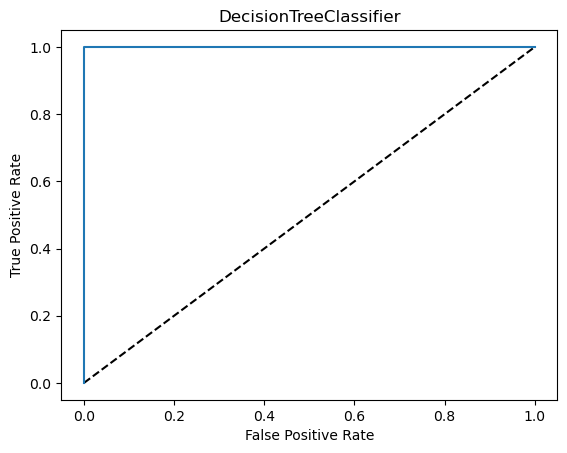

In [311]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='DecisionTreeClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DecisionTreeClassifier')
plt.show()

The area under the curve is 100, so there are no deviations anywhere to the graph.

In [312]:
import joblib
filename='Global Plant'
joblib.dump(GBmodel, 'Global Plant.obj')

['Global Plant.obj']

In [313]:
import joblib
GBmodel=joblib.load('Global Plant.obj')
result=GBmodel.score(x_test, y_test)                               
print(result*100)


100.0


In [314]:
def predict(p):
    p=p.reshape(1, -1) 
    pred=dtc.predict(p)
    print("Primary_fuel type=", pred)
    if (pred==0):
        print("Coal")
    elif (pred==1):
        print("Hydro")
    elif (pred==2):
        print("solar")
    elif (pred==3):
        print("wind")
    elif (pred==4):
        print("Gas")
    elif (pred==5):
        print("Biomass")
    elif (pred==6):
        print("Nuclear")

In [315]:
p=np.array([-1.676571,1.153949,-0.919983,1.292854,1.395536,-1.034548,0.327200,0.356092,0.359399,0.360086])
predict(p) 


Primary_fuel type= [1]
Hydro


In [316]:
p=np.array([1.752129,0.135167,1.263537,1.616405,1.795252,-0.508564,0.407704,0.665917,1.898269,1.564919])
predict(p)

Primary_fuel type= [1]
Hydro


In [317]:
p=np.array([-0.738420,-1.833433,0.262984,-0.618657,-0.181973,-0.530451,0.407704,0.327200,0.356092,0.360086])
predict(p)

Primary_fuel type= [0]
Coal


In [318]:
p=np.array([-1.676571,1.153949,-0.919983,-0.618657,1.292854,1.395536,-1.034548,0.327200,0.356092,0.360086])
predict(p)

Primary_fuel type= [0]
Coal
